In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from scipy.signal import savgol_filter
plt.style.use('seaborn')

In [2]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210330_spectrometer_tests/spect_test5.h5'
file = path_name + test_file_name

with h5py.File(file, 'r') as h5_file:
    vis_cal = h5_file['session001/cal001'].attrs['white_spectrum'][:]
    ftir_cal = h5_file['session001/cal001'].attrs['white_spectrum2'][:]
    vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
    ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

In [3]:
with h5py.File(file, 'r') as h5_file:
    vis_abs_ins001 = h5_file['session001/cal001/ins001/spectrometer1/derived/absorbances'][:]
    vis_ins001 = h5_file['session001/cal001/ins001/spectrometer1/spectra'][:]
    ftir_abs_ins001 = h5_file['session001/cal001/ins001/spectrometer2/derived/absorbances'][:]
    ftir_ins001 = h5_file['session001/cal001/ins001/spectrometer2/spectra'][:]

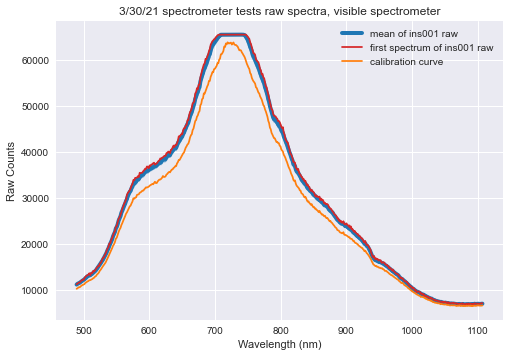

In [4]:
fig, ax = plt.subplots()
ax.set_title("3/30/21 spectrometer tests raw spectra, visible spectrometer")
ax.set_ylabel("Raw Counts")
ax.set_xlabel("Wavelength (nm)")
ax.plot(vis_waves, vis_ins001.mean(axis=0), "tab:blue", lw=4, label="mean of ins001 raw")
ax.plot(vis_waves, vis_ins001.mean(axis=0) - vis_ins001.std(axis=0), "tab:blue", alpha=0.5)
ax.plot(vis_waves, vis_ins001.mean(axis=0) + vis_ins001.std(axis=0), "tab:blue", alpha=0.5)
ax.plot(vis_waves, vis_ins001[0, :], "tab:red", label="first spectrum of ins001 raw" )
ax.plot(vis_waves, vis_cal, "tab:orange", label="calibration curve")
ax.legend()
plt.show()
plt.close()

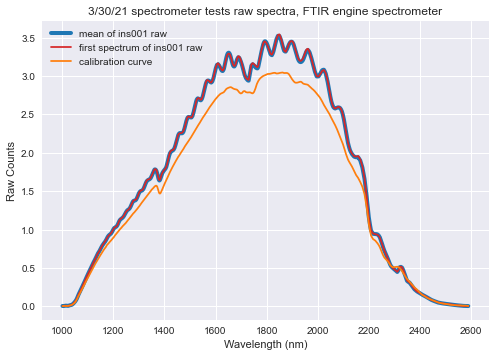

In [5]:
fig, ax = plt.subplots()
ax.set_title("3/30/21 spectrometer tests raw spectra, FTIR engine spectrometer")
ax.set_ylabel("Raw Counts")
ax.set_xlabel("Wavelength (nm)")
ax.plot(ftir_waves, ftir_ins001.mean(axis=0), "tab:blue", lw=4, label="mean of ins001 raw")
ax.plot(ftir_waves, ftir_ins001[0, :], "tab:red", label="first spectrum of ins001 raw" )
ax.plot(ftir_waves, ftir_cal, "tab:orange", label="calibration curve")
ax.legend()
plt.show()
plt.close()

In [6]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210419_green_tests/green_testing_210419.h5'
file = path_name + test_file_name

with h5py.File(file, 'r') as h5_file:
    vis_cal2 = h5_file['session001/cal002'].attrs['white_spectrum'][:]
    ftir_cal2 = h5_file['session001/cal002'].attrs['white_spectrum2'][:]
    vis_waves = h5_file['session001/cal002'].attrs['spec1_wavelengths_vector'][:]
    ftir_waves = h5_file['session001/cal002'].attrs['spec2_wavelengths_vector'][:]
    vis_cal3 = h5_file['session001/cal003'].attrs['white_spectrum'][:]
    ftir_cal3 = h5_file['session001/cal003'].attrs['white_spectrum2'][:]

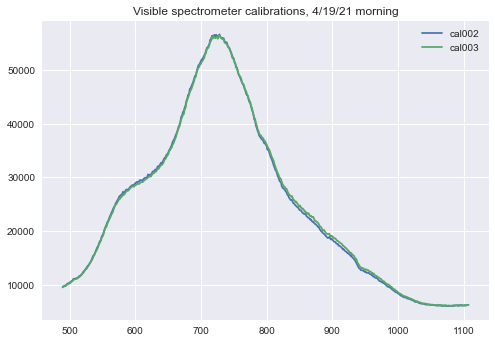

In [7]:
fig, ax = plt.subplots()
ax.set_title("Visible spectrometer calibrations, 4/19/21 morning")
ax.plot(vis_waves, vis_cal2, label="cal002")
ax.plot(vis_waves, vis_cal3, label="cal003")
ax.legend()
plt.show()
plt.close()

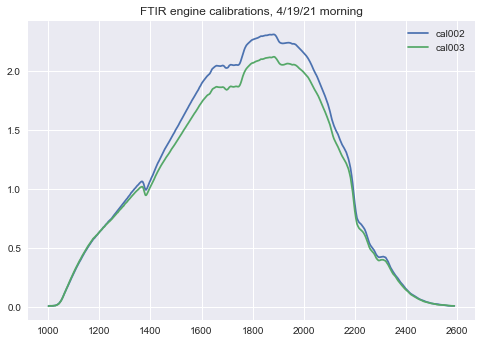

In [8]:
fig, ax = plt.subplots()
ax.set_title("FTIR engine calibrations, 4/19/21 morning")
ax.plot(ftir_waves, ftir_cal2, label="cal002")
ax.plot(ftir_waves, ftir_cal3, label="cal003")
ax.legend()
plt.show()
plt.close()

In [9]:
with h5py.File(file, 'r') as h5_file:
    ins_cal2 = list(h5_file['session001/cal002'].keys())
    ins_cal3 = list(h5_file['session001/cal003'].keys())

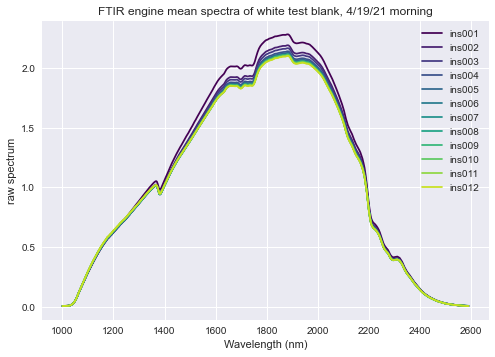

In [25]:
fig, ax = plt.subplots()
ax.set_title("FTIR engine mean spectra of white test blank, 4/19/21 morning")
ax.set_ylabel("raw spectrum")
ax.set_xlabel("Wavelength (nm)")
count = len(ins_cal2) + len(ins_cal3)
with h5py.File(file, 'r') as h5_file:
    for insertion in ins_cal2:
        index=ins_cal2.index(insertion)
        color = plt.cm.viridis(index/count)
        ftir_raw = h5_file[f'session001/cal002/{insertion}/spectrometer2/spectra'][:]
        ax.plot(ftir_waves, ftir_raw.mean(axis=0), label=insertion, color=color) 
    
with h5py.File(file, 'r') as h5_file:
    for insertion in ins_cal3:
        index = ins_cal3.index(insertion)
        color = plt.cm.viridis((index + len(ins_cal2))/count)
        ftir_raw = h5_file[f'session001/cal003/{insertion}/spectrometer2/spectra'][:]
        ax.plot(ftir_waves, ftir_raw.mean(axis=0), label=insertion, color=color)
ax.legend()        
plt.show()        
plt.close()

In [18]:
with h5py.File(file, 'r') as h5_file:
    cal2_temp = h5_file['session001/cal002'].attrs['ftir_temperature']
    cal3_temp = h5_file['session001/cal003'].attrs['ftir_temperature']
print(cal2_temp, cal3_temp)

17.101213138770106 17.101213138770106


In [21]:
cal2_temps = []
with h5py.File(file, 'r') as h5_file:
    for insertion in ins_cal2:
        cal2_temps.append(h5_file[f'session001/cal002/{insertion}'].attrs['ftir_temp'])

In [22]:
cal2_temps

[17.287485317909102,
 17.287485317909102,
 17.287485317909102,
 17.287485317909102,
 17.287485317909102,
 17.287485317909102,
 17.287485317909102,
 17.287485317909102]

In [23]:
cal3_temps = []
with h5py.File(file, 'r') as h5_file:
    for insertion in ins_cal3:
        cal3_temps.append(h5_file[f'session001/cal003/{insertion}'].attrs['ftir_temp'])

In [24]:
cal3_temps

[18.693804304886726,
 18.693804304886726,
 18.693804304886726,
 18.693804304886726]

In [26]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210419_green_tests/green_testing_210419c.h5'
file = path_name + test_file_name
with h5py.File(file, 'r') as h5_file:
    vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
    ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

In [27]:
with h5py.File(file, 'r') as h5_file:
    cals = list(h5_file['session001'].keys())

In [28]:
cals

['cal001', 'cal002', 'cal003', 'cal004', 'cal005', 'cal006']

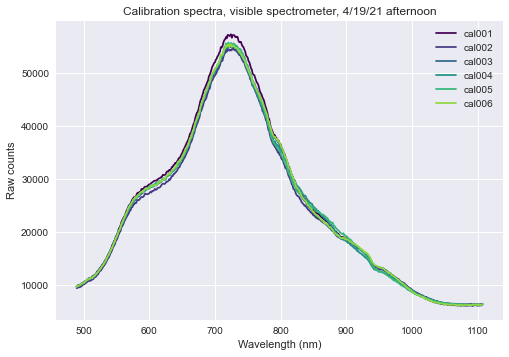

In [32]:
fig, ax = plt.subplots()
ax.set_title("Calibration spectra, visible spectrometer, 4/19/21 afternoon")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")

with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        vis_cal = h5_file[f'session001/{cal}'].attrs['white_spectrum'][:]
        index = cals.index(cal)
        color = plt.cm.viridis(index/len(cals))
        ax.plot(vis_waves, vis_cal, color=color, label=cal)
ax.legend()
plt.show()
plt.close()
        

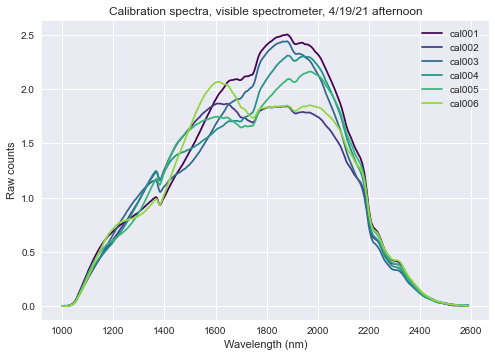

In [33]:
fig, ax = plt.subplots()
ax.set_title("Calibration spectra, visible spectrometer, 4/19/21 afternoon")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")

with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        ftir_cal = h5_file[f'session001/{cal}'].attrs['white_spectrum2'][:]
        index = cals.index(cal)
        color = plt.cm.viridis(index/len(cals))
        ax.plot(ftir_waves, ftir_cal, color=color, label=cal)
ax.legend()
plt.show()
plt.close()

In [34]:
cal_temps = []
with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        cal_temps.append(h5_file[f'session001/{cal}'].attrs['ftir_temperature'])
print(cal_temps)

[25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182]


In [40]:
insertions = ['session001/cal001/ins001', 'session001/cal001/ins002', 'session001/cal001/ins003', 'session001/cal001/ins005',
             'session001/cal002/ins006', 'session001/cal002/ins007', 'session001/cal002/ins008', 'session001/cal002/ins009',
             'session001/cal006/ins010', 'session001/cal006/ins011', 'session001/cal006/ins012', 'session001/cal006/ins013']

In [41]:
insertion_temps = []
with h5py.File(file, 'r') as h5_file:
    
    for insertion in insertions:
        insertion_temps.append(h5_file[f'{insertion}'].attrs['ftir_temp'])
print(insertion_temps)

[25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.457273258346277, 25.457273258346277, 25.457273258346277, 25.457273258346277, 28.478563653676304, 28.478563653676304, 28.478563653676304, 28.478563653676304]


In [43]:
cals = ['cal001', 'cal002', 'cal003', 'cal004']


In [44]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210420_green_tests/green_testing_210420.h5'
file = path_name + test_file_name

temps = []

with h5py.File(file, 'r') as h5_file:
    vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
    ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]
    
    for cal in cals:
        temps.append(h5_file[f'session001/{cal}'].attrs['ftir_temperature'])

print(temps)




[20.005789715422964, 20.005789715422964, 20.005789715422964, 20.005789715422964]


In [46]:
insertions = []
with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        cal_ins = list(h5_file[f'session001/{cal}'].keys())
        for ins in cal_ins:
            insertions.append(f'session001/{cal}/{ins}')
print(insertions)

['session001/cal001/ins001', 'session001/cal001/ins002', 'session001/cal001/ins003', 'session001/cal001/ins004', 'session001/cal002/ins005', 'session001/cal002/ins006', 'session001/cal002/ins007', 'session001/cal002/ins008', 'session001/cal002/ins009', 'session001/cal003/ins010', 'session001/cal003/ins011', 'session001/cal003/ins012', 'session001/cal003/ins013', 'session001/cal004/ins014']


In [51]:
ins_temps = []

with h5py.File(file, 'r') as h5_file:

    
    for insertion in insertions:
        ins_temps.append(h5_file[insertion].attrs['ftir_temp'])

print(ins_temps)

[20.21176335497819, 20.21176335497819, 20.21176335497819, 20.21176335497819, 20.99961456099294, 20.99961456099294, 20.99961456099294, 20.99961456099294, 20.99961456099294, 21.404156600133376, 21.404156600133376, 21.404156600133376, 21.404156600133376, 18.45188954353108]


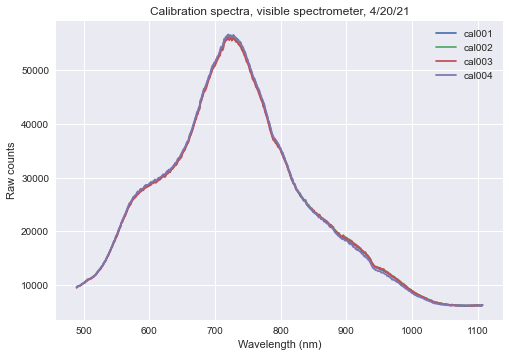

In [54]:
fig, ax = plt.subplots()
ax.set_title("Calibration spectra, visible spectrometer, 4/20/21")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")
with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        spectrum = h5_file[f'session001/{cal}'].attrs['white_spectrum'][:]
        ax.plot(vis_waves, spectrum, label=cal)
ax.legend()
plt.show()
plt.close()

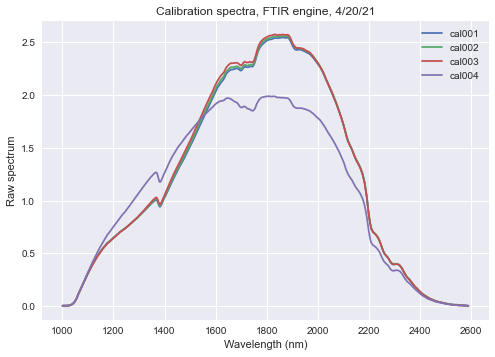

In [55]:
fig, ax = plt.subplots()
ax.set_title("Calibration spectra, FTIR engine, 4/20/21")
ax.set_ylabel("Raw spectrum")
ax.set_xlabel("Wavelength (nm)")
with h5py.File(file, 'r') as h5_file:
    for cal in cals:
        spectrum = h5_file[f'session001/{cal}'].attrs['white_spectrum2'][:]
        ax.plot(ftir_waves, spectrum, label=cal)
ax.legend()
plt.show()
plt.close()

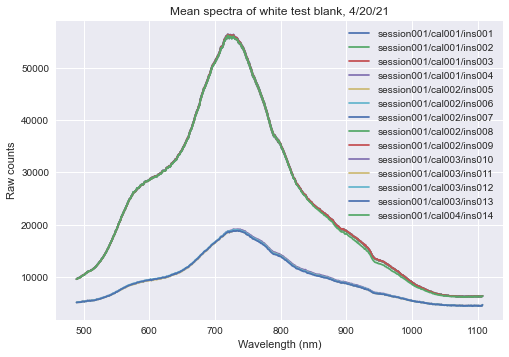

In [56]:
fig, ax = plt.subplots()
ax.set_title("Mean raw spectra, 4/20/21")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")
with h5py.File(file, 'r') as h5_file:
    for insertion in insertions:
        spectra = h5_file[f'{insertion}/spectrometer1/spectra'][:]
        ax.plot(vis_waves, spectra.mean(axis=0), label=insertion)
ax.legend()
plt.show()
plt.close()

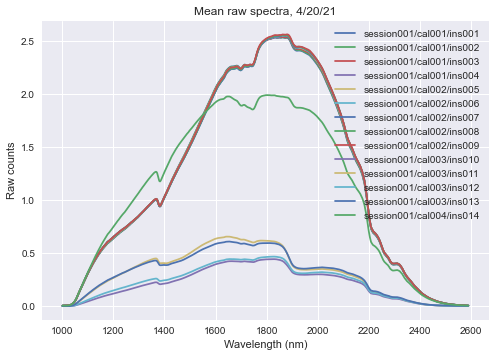

In [57]:
fig, ax = plt.subplots()
ax.set_title("Mean raw spectra, 4/20/21")
ax.set_ylabel("Raw counts")
ax.set_xlabel("Wavelength (nm)")
with h5py.File(file, 'r') as h5_file:
    for insertion in insertions:
        spectra = h5_file[f'{insertion}/spectrometer2/spectra'][:]
        ax.plot(ftir_waves, spectra.mean(axis=0), label=insertion)
ax.legend()
plt.show()
plt.close()

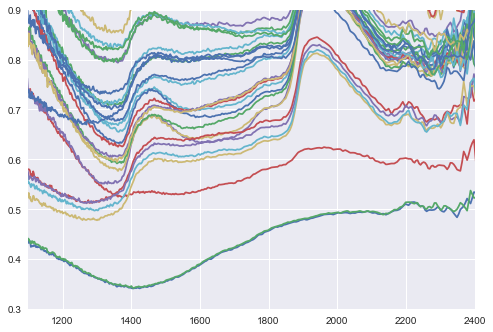

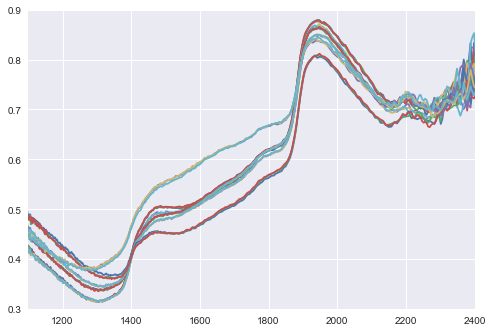

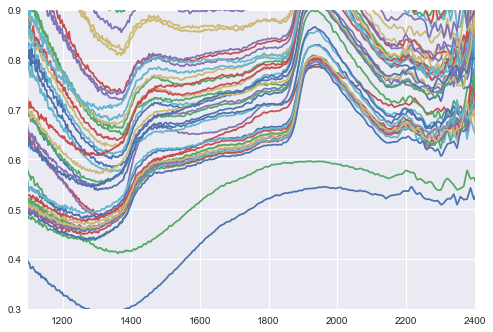

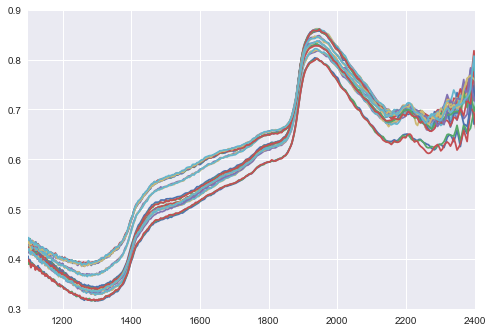

In [61]:
soil_insertions = ['ins010', 'ins011', 'ins012', 'ins013']
with h5py.File(file, 'r') as h5_file:
    for insertion in soil_insertions:
        fig, ax = plt.subplots()
        ax.set_ylim(0.3, 0.9)
        ax.set_xlim(1100, 2400)
        ins_abs = h5_file[f'session001/cal003/{insertion}/spectrometer2/derived/absorbances'][:]
        for i in range(ins_abs.shape[0]):
            ax.plot(ftir_waves, ins_abs[i, :])
plt.show()
plt.close()

In [62]:
path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210419_green_tests/green_testing_210419b.h5'
yester_morning = path_name + test_file_name

path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210419_green_tests/green_testing_210419c.h5'
yester_afternoon = path_name + test_file_name

path_name = "/Users/linda/OneDrive/Documents/S4_mine_p/Projects/Data_collected/"
test_file_name = '210420_green_tests/green_testing_210420.h5'
this_morning = path_name + test_file_name

In [69]:
with h5py.File(yester_morning, 'r') as h5_file:
    front2_1 = h5_file['session002/cal001/ins002/derived/absorbance_depth'][:]
    
with h5py.File(yester_afternoon, 'r') as h5_file:
    front2_2 = h5_file['session001/cal001/ins005/derived/absorbance_depth'][:]
    
with h5py.File(this_morning, 'r') as h5_file:
    front2_3 = h5_file['session001/cal003/ins013/derived/absorbance_depth'][:]
    

In [68]:
with h5py.File(yester_afternoon, 'r') as h5_file:
    print(h5_file['session001/cal001/ins005/derived'].keys())

<KeysViewHDF5 ['absorbance_depth', 'absorbance_depth_timestamps', 'depth_increment_data', 'force_depth', 'force_depth_timestamps']>


In [71]:
print(front2_1[:, -1])

[ 3.45622787  3.45622787  3.45622787  5.79704132  5.79704132  5.79704132
  7.62030411  7.62030411  7.62030411  9.44412537  9.44412537  9.44412537
 11.75252838 11.75252838 11.75252838 13.74373627 13.74373627 13.74373627
 15.26890259 15.26890259 15.26890259 17.8526947  17.8526947  17.8526947
 19.93016052 19.93016052 19.93016052 21.91069946 21.91069946 21.91069946
 23.54224243 23.54224243 23.54224243 25.52029266 25.50571594 25.43378143
 28.94258728 28.94258728 28.94248657 31.18474731 31.18469543 31.18469543
 33.40201721 33.40186157 33.40181274 36.39291687 36.39291687 36.39291687
 38.83695374 38.83690186 38.83690186 41.64954529 41.64949341 41.64949341
 44.28881226 44.28881226 44.28881226 46.57470703 46.57475891 46.57475891
 46.82367859 46.82367859 46.82367859]


In [72]:
print(front2_2[:, -1])

[ 2.74843235  2.74843235  2.74843235  4.59003296  4.59003296  4.59003296
  6.40145874  6.40145874  6.40145874  8.57737579  8.57737579  8.57737579
 10.06175232 10.06175232 10.06175232 12.02674637 12.02674637 12.02674637
 13.63588715 13.63588715 13.63588715 15.91736603 15.91736603 15.91736603
 18.67595978 18.67595978 18.67595978 21.0613739  21.06091614 21.05405884
 23.1606842  23.15677185 23.1567215  27.52237244 27.49829102 27.49829102
 29.84210205 29.84210205 29.84210205 36.31331177 36.31331177 36.31331177
 39.19204712 39.19204712 39.19204712 42.07118835 42.07123413 42.07123413
 44.09287415 44.09287415 44.09287415]


In [73]:
print(front2_3[:, -1])

[ 4.9293766   4.9293766   4.9293766   9.21705017  9.21705017  9.21705017
 15.10045166 15.10045166 15.10045166 21.94326324 21.94326324 21.94326324
 30.92779846 30.92779846 30.92779846 37.74048767 37.74043884 37.74043884
 44.60061951 44.60061951 44.60061951 54.27883301 54.27883301 54.27883301]


In [87]:
front2_1_df = pd.DataFrame(front2_1[:, 512:-2])
front2_2_df = pd.DataFrame(front2_2[:, 512:-2])
front2_3_df = pd.DataFrame(front2_3[:, 512:-2])

In [88]:
front2_1_df['depth'] = front2_1[:, -1]
front2_2_df['depth'] = front2_2[:, -1]
front2_3_df['depth'] = front2_3[:, -1]

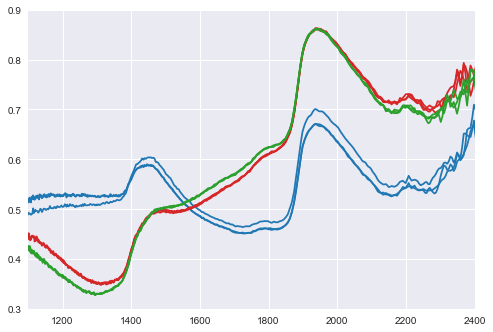

In [94]:
fig, ax = plt.subplots()
ax.set_ylim(0.3, 0.9)
ax.set_xlim(1100, 2400)
for i in range(8, 11):
    ax.plot(ftir_waves, front2_1_df.iloc[i, :-1], 'tab:blue')
for i in range(9, 12):
    ax.plot(ftir_waves, front2_2_df.iloc[i, :-1], 'tab:red')
for i in range(3, 6):
    ax.plot(ftir_waves, front2_3_df.iloc[i, :-1], 'tab:green')
plt.show()
plt.close()


In [97]:
def select_by_depth_range(df, range_start, range_end):
    df_out = df.loc[(df['depth'] > range_start) & (df['depth'] < range_end)]
    return df_out

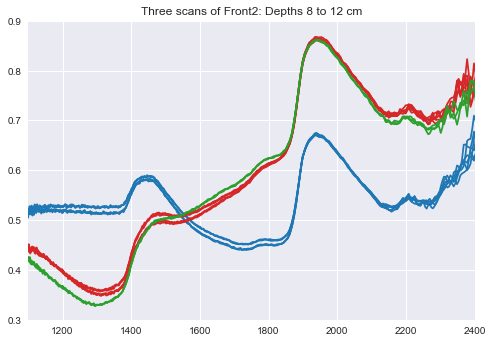

In [108]:
dfs = [front2_1_df, front2_2_df, front2_3_df]
colors = ['tab:blue', 'tab:red', 'tab:green']
fig, ax = plt.subplots()
depth_min = 8
depth_max = 12
ax.set_ylim(0.3, 0.9)
ax.set_xlim(1100, 2400)
ax.set_title(f'Three scans of Front2: Depths {depth_min} to {depth_max} cm')
for df, color in zip(dfs, colors):
    range_df = select_by_depth_range(df, depth_min, depth_max)
    
    for i in range(range_df.shape[0]):
        ax.plot(ftir_waves, range_df.iloc[i, :-1], color=color)
plt.show()
plt.close()


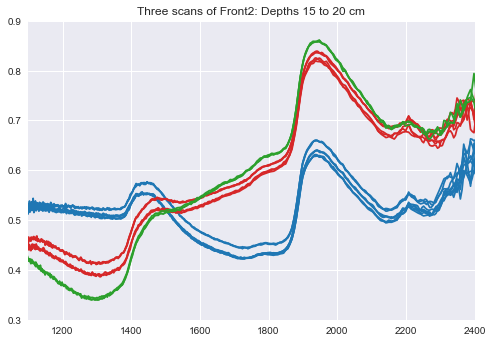

In [109]:
dfs = [front2_1_df, front2_2_df, front2_3_df]
colors = ['tab:blue', 'tab:red', 'tab:green']
fig, ax = plt.subplots()
depth_min = 15
depth_max = 20
ax.set_ylim(0.3, 0.9)
ax.set_xlim(1100, 2400)
ax.set_title(f'Three scans of Front2: Depths {depth_min} to {depth_max} cm')
for df, color in zip(dfs, colors):
    range_df = select_by_depth_range(df, depth_min, depth_max)
    
    for i in range(range_df.shape[0]):
        ax.plot(ftir_waves, range_df.iloc[i, :-1], color=color)
plt.show()
plt.close()

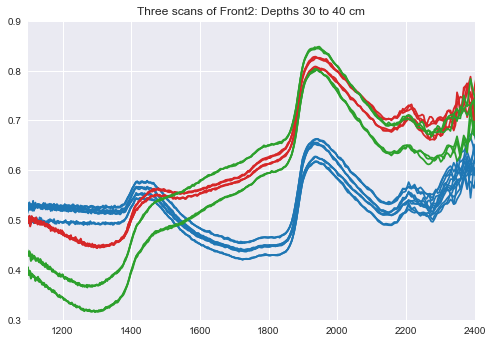

In [110]:
dfs = [front2_1_df, front2_2_df, front2_3_df]
colors = ['tab:blue', 'tab:red', 'tab:green']
fig, ax = plt.subplots()
depth_min = 30
depth_max = 40
ax.set_ylim(0.3, 0.9)
ax.set_xlim(1100, 2400)
ax.set_title(f'Three scans of Front2: Depths {depth_min} to {depth_max} cm')
for df, color in zip(dfs, colors):
    range_df = select_by_depth_range(df, depth_min, depth_max)
    
    for i in range(range_df.shape[0]):
        ax.plot(ftir_waves, range_df.iloc[i, :-1], color=color)
plt.show()
plt.close()

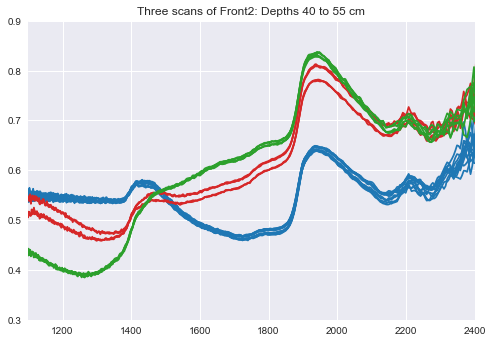

In [111]:
dfs = [front2_1_df, front2_2_df, front2_3_df]
colors = ['tab:blue', 'tab:red', 'tab:green']
fig, ax = plt.subplots()
depth_min = 40
depth_max = 55
ax.set_ylim(0.3, 0.9)
ax.set_xlim(1100, 2400)
ax.set_title(f'Three scans of Front2: Depths {depth_min} to {depth_max} cm')
for df, color in zip(dfs, colors):
    range_df = select_by_depth_range(df, depth_min, depth_max)
    
    for i in range(range_df.shape[0]):
        ax.plot(ftir_waves, range_df.iloc[i, :-1], color=color)
plt.show()
plt.close()

In [112]:
with h5py.File(this_morning, 'r') as h5_file:
    print(h5_file['session001'].attrs.keys())

<KeysViewHDF5 ['encoder', 'encoder_host', 'encoder_tags', 'load_cell', 'load_cell_port', 'load_cell_repetitions', 'session_location', 'session_name', 'session_number', 'spectrometer1', 'spectrometer2']>


In [114]:
with h5py.File(this_morning, 'r') as h5_file:
    cal_attrs = list(h5_file['session001/cal003'].attrs.keys())
    for attr in cal_attrs:
        print(attr, h5_file['session001/cal003'].attrs[attr])

calibration_start_time 1618905622975904
dark_spectrum [4137.25 4133.   4112.75 4122.   4102.   4167.75 4144.25 4162.25 4069.
 4147.   4090.5  4194.5  4154.5  4163.25 4104.5  4158.5  4095.5  4099.
 4096.5  4131.   4098.   4157.   4076.75 4166.5  4076.75 4144.   4157.75
 4121.   4177.5  4127.75 4119.25 4101.25 4135.   4118.5  4015.25 4105.75
 4055.   4056.5  4104.   4108.25 4049.75 4163.75 4106.75 4112.75 4074.75
 4131.75 4131.25 4169.5  4073.75 4131.   4176.75 4104.5  4164.   4118.
 4114.75 4129.25 4079.5  4115.   4046.75 4038.   4026.25 4068.25 4052.75
 4062.75 4077.25 4098.75 4088.   4142.5  4123.5  4114.5  4119.   4080.
 4133.5  4139.5  4179.25 4143.25 4118.5  4121.5  4158.5  4211.5  4047.5
 4118.75 4040.25 4169.   4152.   4152.25 4101.5  4134.5  4119.75 4156.75
 4064.25 4080.5  4059.25 4109.5  4080.25 4092.   4006.75 4102.5  4026.
 4042.   4099.   4119.5  4130.   4208.   4204.   4221.75 4137.25 4208.5
 4110.   4150.5  4168.25 4175.5  4086.5  4152.25 4158.5  4110.   4202.5
 4158.75 4

In [115]:
with h5py.File(this_morning, 'r') as h5_file:
    ins_attrs = list(h5_file['session001/cal003/ins010'].attrs.keys())
    for attr in ins_attrs:
        print(attr, h5_file['session001/cal003/ins010'].attrs[attr])

end_time 1618909628832890
ftir_temp 21.404156600133376
start_time 1618909593854004


In [198]:
vis_file_names = ['210401_tests/vis_ftir_test1.h5',
                  '210402_SOC_canister/tests_210402.h5',
                  '210407_test_in_yard_and_canisters/soc_210407.h5',
                  '210409_stationary_moving/blank_210409.h5',
                  '210413_BNP_transect/BNP_data_collection_210413.h5',
                  '210414_BNP_transect2/BNP_data_collection_210414.h5',
                  '210415_visible_spec_tests/visspec_testing_210415.h5',
                  '210416_green_tests/green_testing_210416.h5',
                  '210419_green_tests/green_testing_210419.h5',
                  '210419_green_tests/green_testing_210419b.h5',
                  '210419_green_tests/green_testing_210419c.h5',
                  '210420_green_tests/green_testing_210420.h5',
                  '210420_green_tests/more/green_testing_210420b.h5',
                  '210420_green_tests/more/green_testing_210420c.h5']
vis_file_dates =['04/01/2021', '04/02/2021', '04/07/2021',
                '04/09/2021', '04/13/2021', '04/14/2021',
                '04/15/2021', '04/16/2021', '04/19/2021',
                '04/19/2021', '04/19/2021', '04/20/2021',
                 '04/20/2021', '04/20/2021']

In [117]:
def create_list_of_items_in_node(item_type, h5_file, node):
    keys = []
    if item_type == "group":
        my_type = h5py._hl.group.Group
    if item_type == "dataset":
        my_type = h5py._hl.dataset.Dataset
    h5_file[node].visit(lambda key: keys.append(key) if type(h5_file[node][key]) is my_type else None)
    return keys

def create_list_of_calibrations_in_node(h5_file, node):
    calibrations = []
    all_groups = create_list_of_items_in_node("group", h5_file, node)
    for group in all_groups:
        if group[-6:-3] == 'cal':
            calibrations.append(group)
    return calibrations

def create_session_calibration_dict(h5_file):
    keys = list(h5_file.keys())
    key_dict = {}
    for key in keys:
        key_dict[key] = create_list_of_calibrations_in_node(h5_file, key)
    print(key_dict)
    return key_dict

In [200]:
vis_cals = []
for file_name in vis_file_names:
    entire_path = f'{path_name}{file_name}'
    print(file_name)
    with h5py.File(entire_path, 'r') as h5_file:
        calibrations = create_list_of_calibrations_in_node(h5_file, "/")
        for calibration in calibrations:
            vis_cals.append((file_name, calibration))

210401_tests/vis_ftir_test1.h5
210402_SOC_canister/tests_210402.h5
210407_test_in_yard_and_canisters/soc_210407.h5
210409_stationary_moving/blank_210409.h5
210413_BNP_transect/BNP_data_collection_210413.h5
210414_BNP_transect2/BNP_data_collection_210414.h5
210415_visible_spec_tests/visspec_testing_210415.h5
210416_green_tests/green_testing_210416.h5
210419_green_tests/green_testing_210419.h5
210419_green_tests/green_testing_210419b.h5
210419_green_tests/green_testing_210419c.h5
210420_green_tests/green_testing_210420.h5
210420_green_tests/more/green_testing_210420b.h5
210420_green_tests/more/green_testing_210420c.h5


In [201]:
len(vis_cals)

65

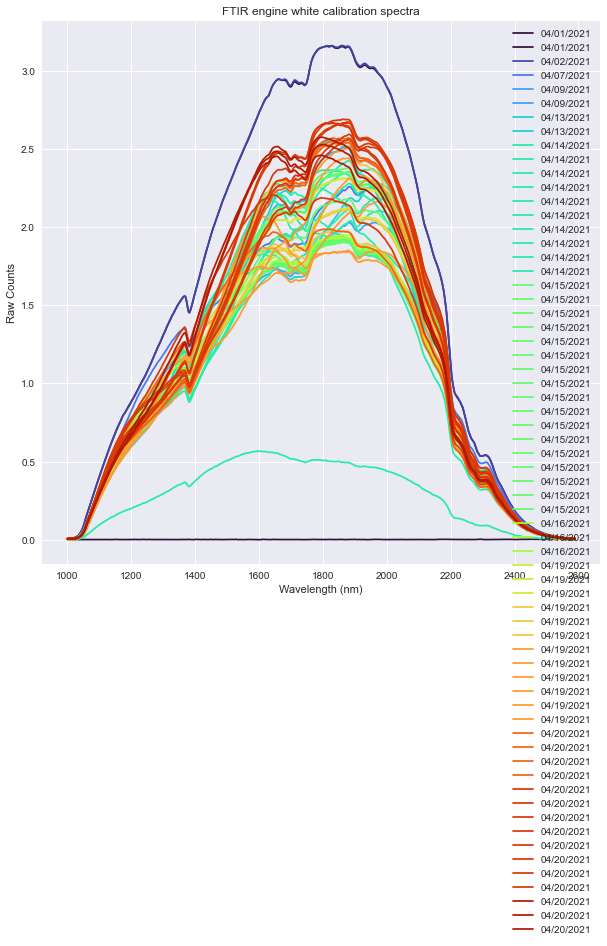

In [202]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("FTIR engine white calibration spectra")
ax.set_ylabel("Raw Counts")
ax.set_xlabel("Wavelength (nm)")
# ax.set_ylim(10000, 30000)
for cal in vis_cals:
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.turbo(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
plt.legend(loc="upper right")
plt.show()
plt.close()

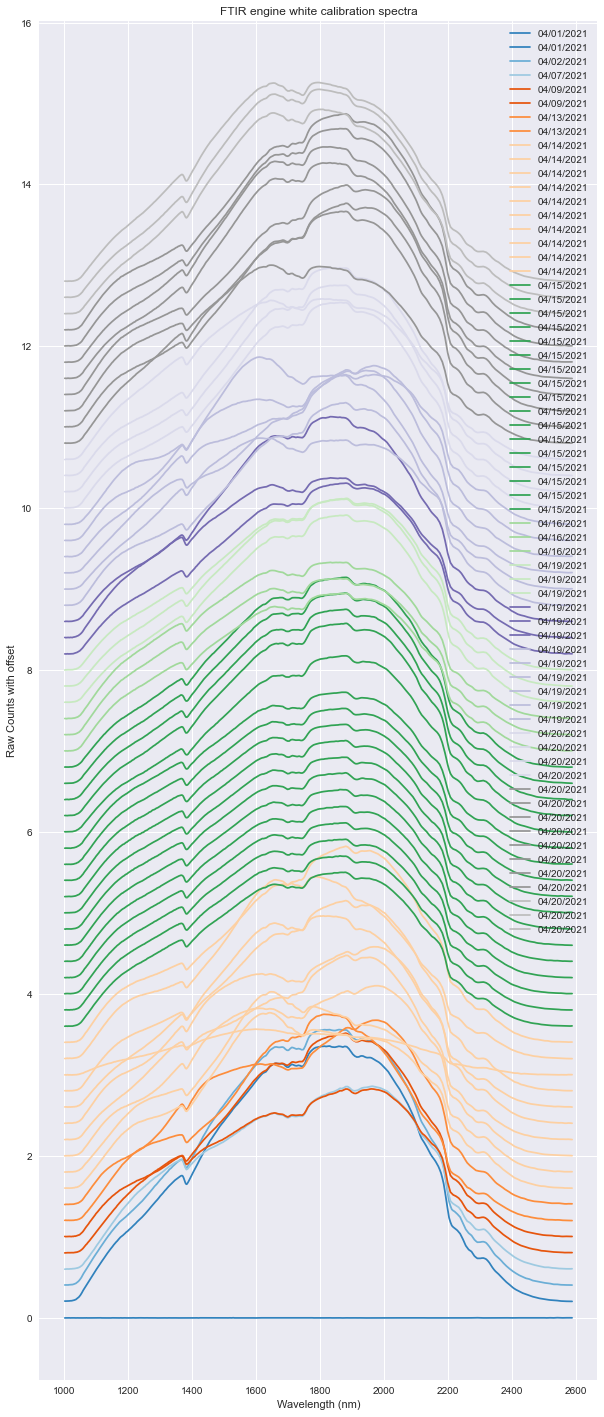

In [204]:
fig, ax = plt.subplots(figsize=(10, 25))
ax.set_title("FTIR engine white calibration spectra")
ax.set_ylabel("Raw Counts with offset")
ax.set_xlabel("Wavelength (nm)")
# ax.set_ylim(10000, 30000)
for cal in vis_cals:
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.tab20c(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:] + offset
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
plt.legend(loc="upper right")
plt.show()
plt.close()

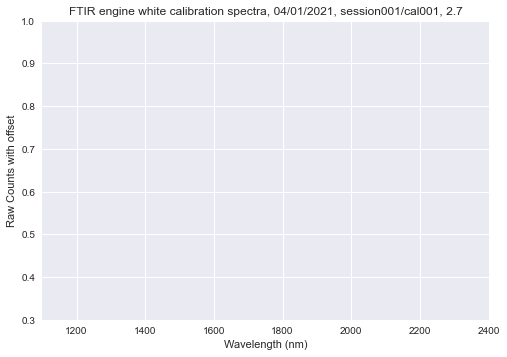

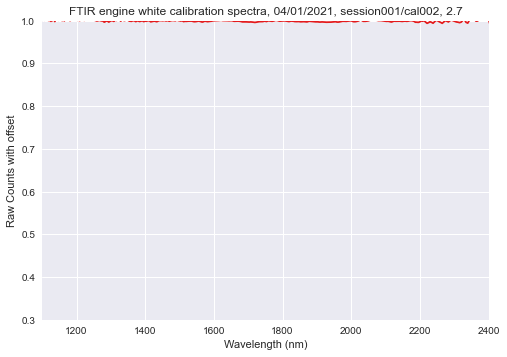

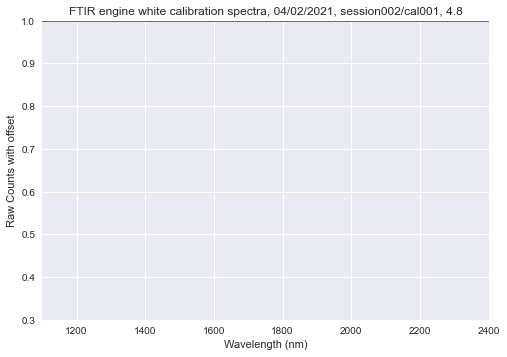

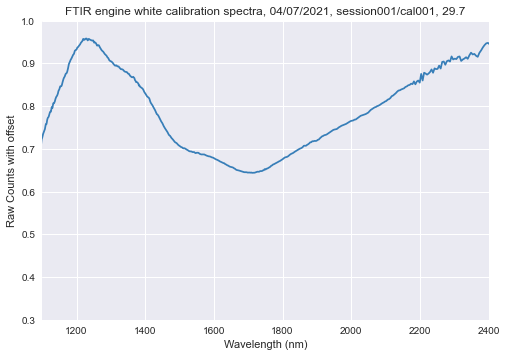

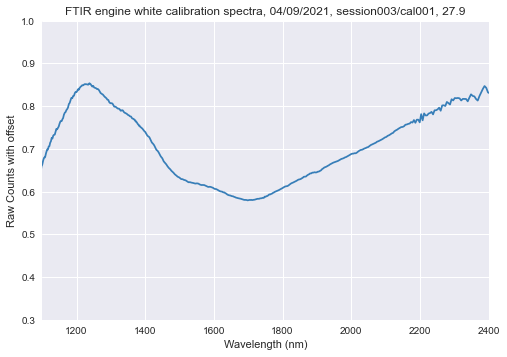

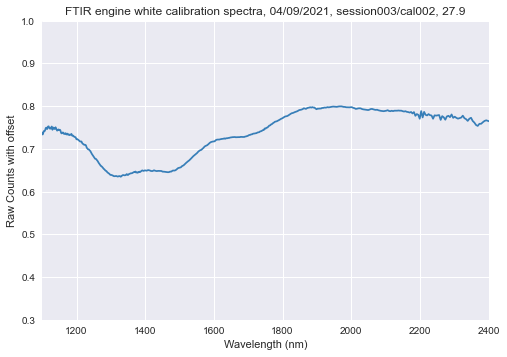

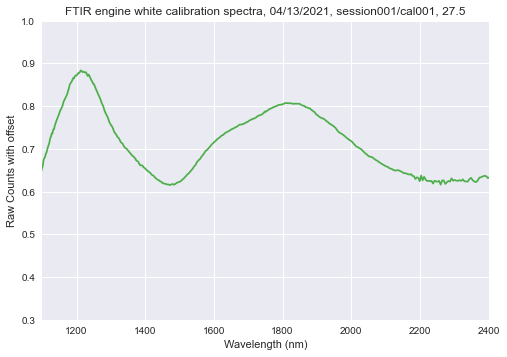

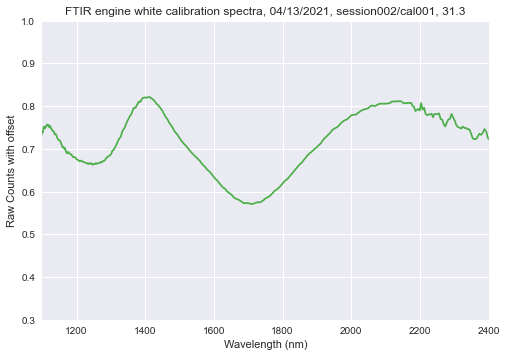

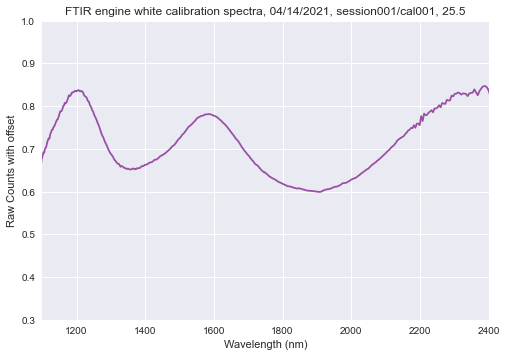

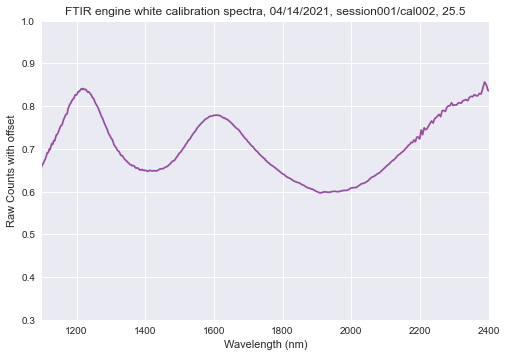

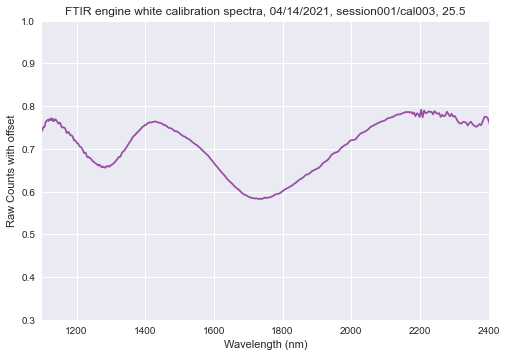

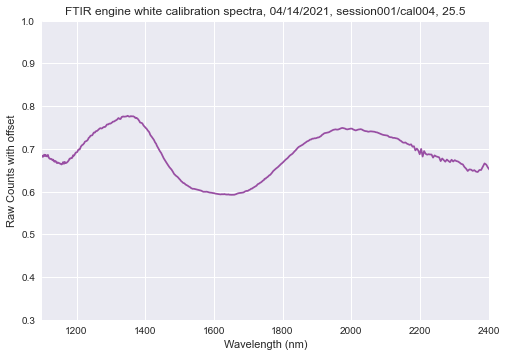

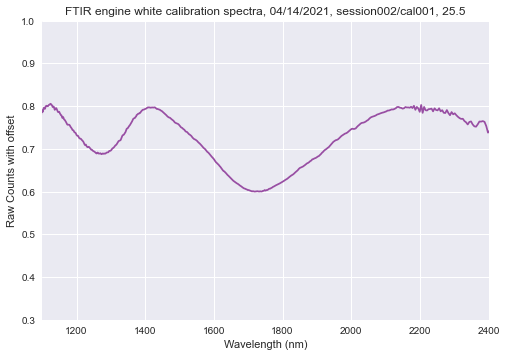

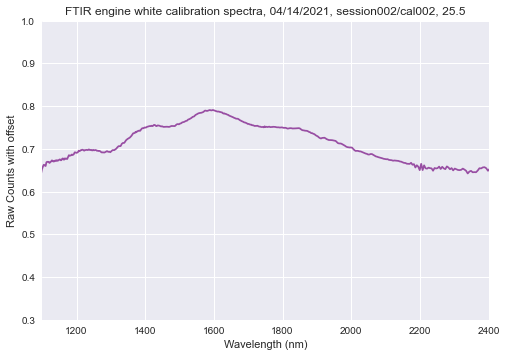

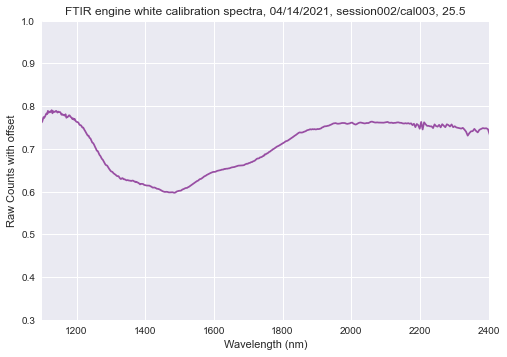

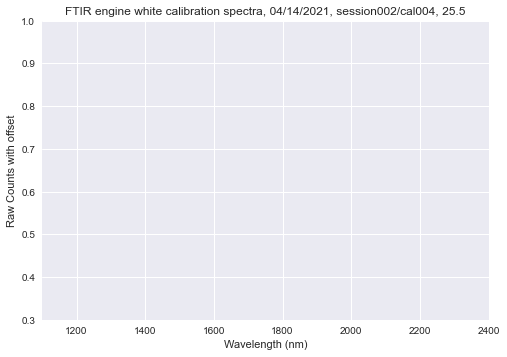

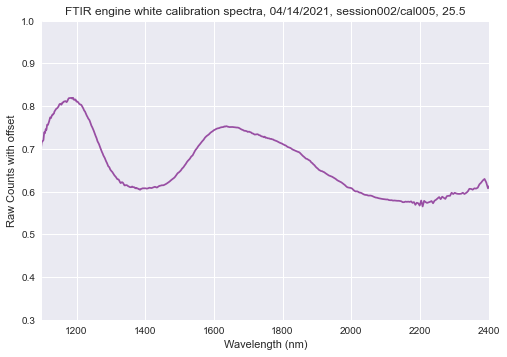

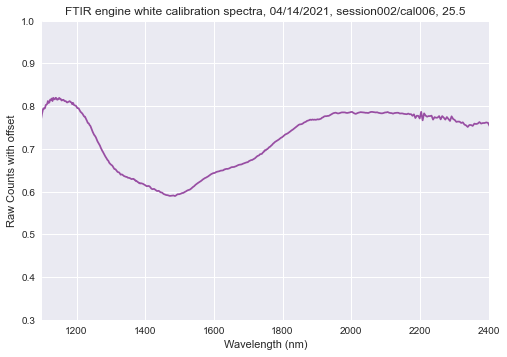

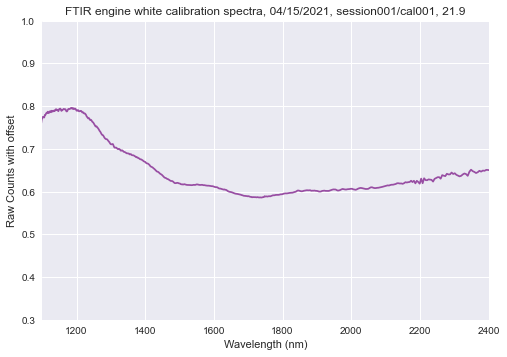

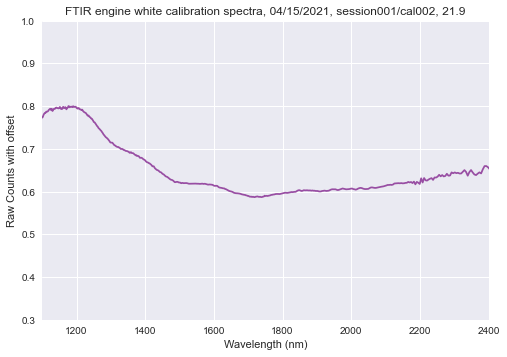

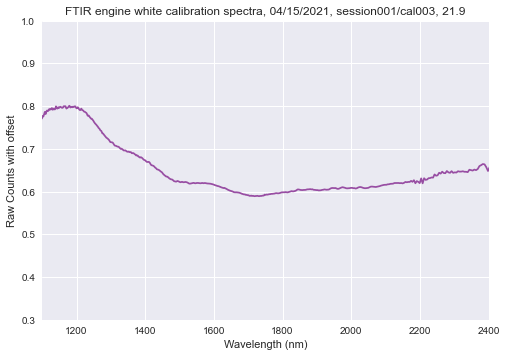

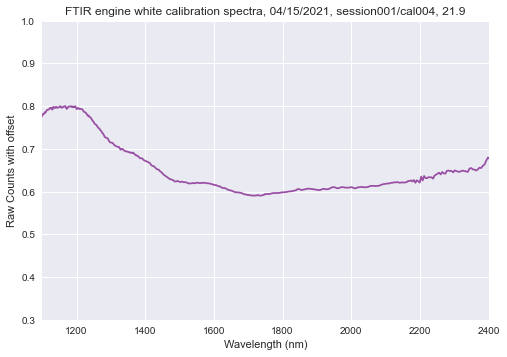

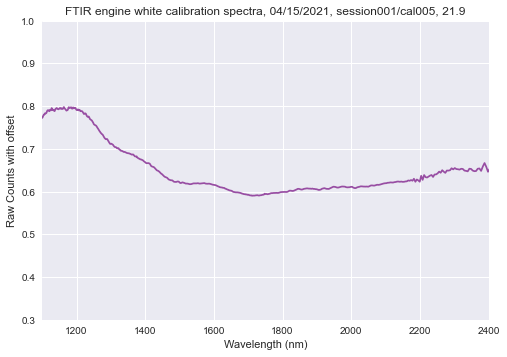

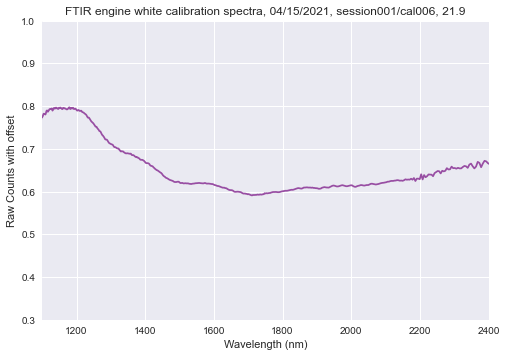

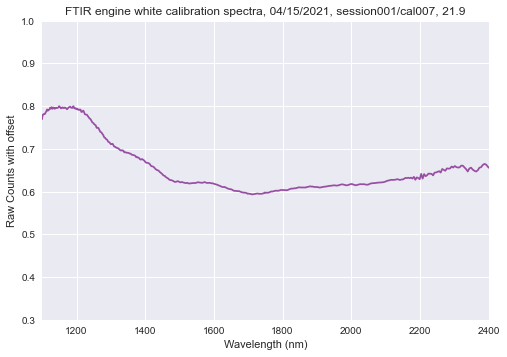

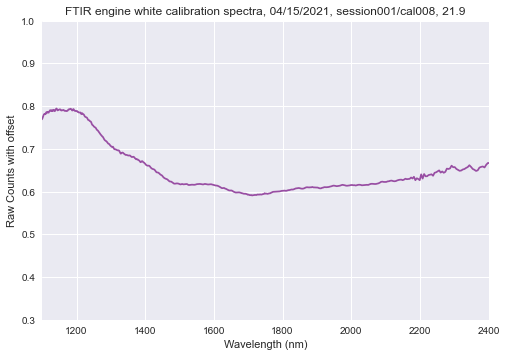

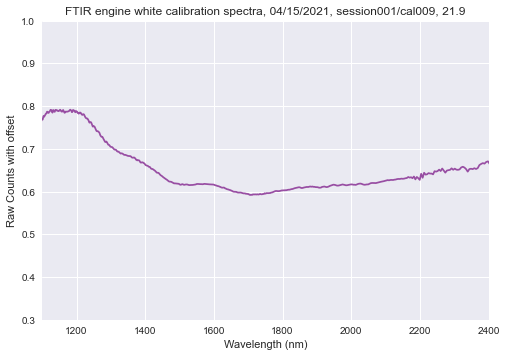

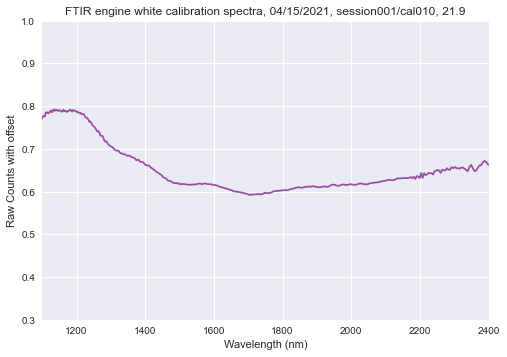

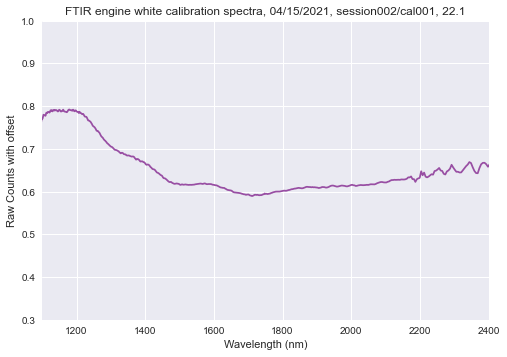

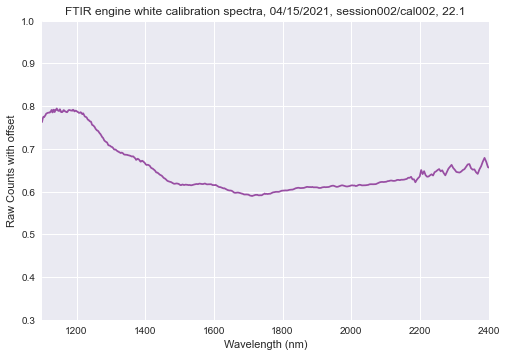

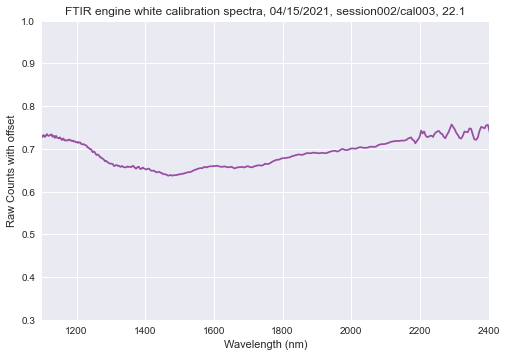

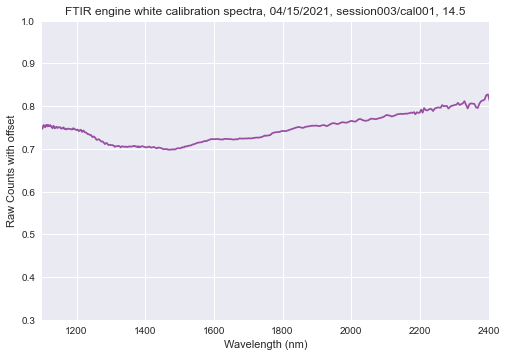

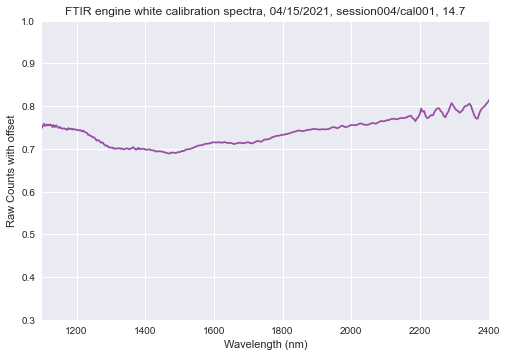

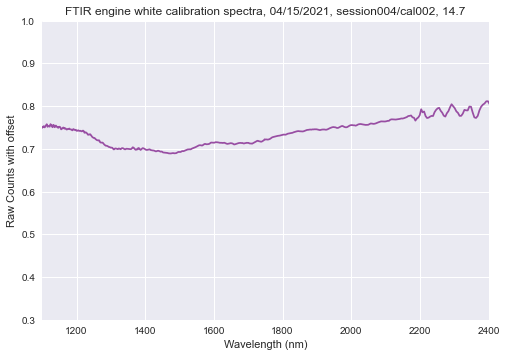

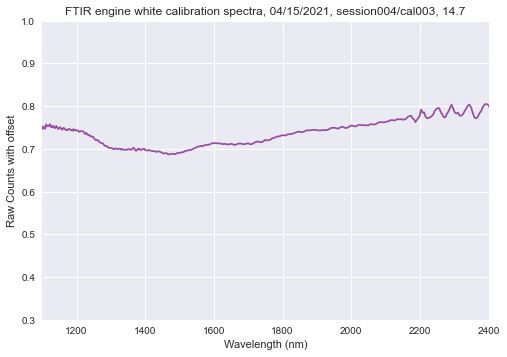

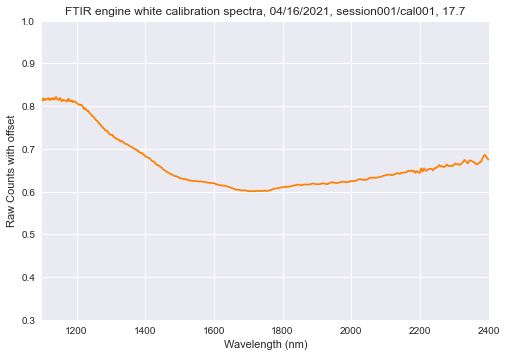

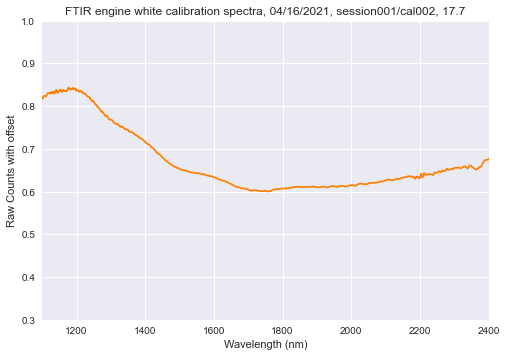

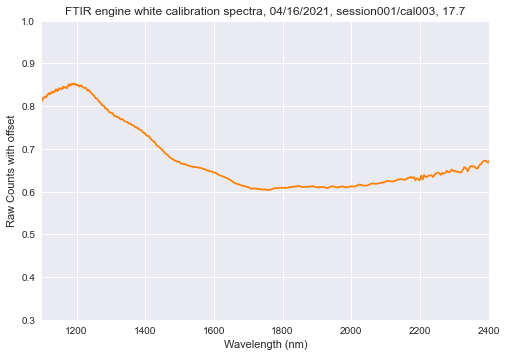

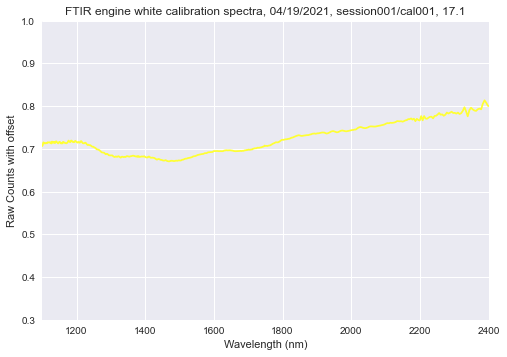

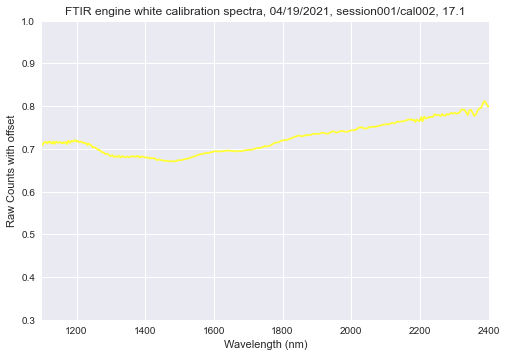

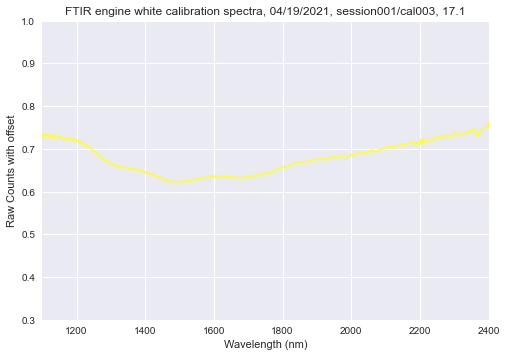

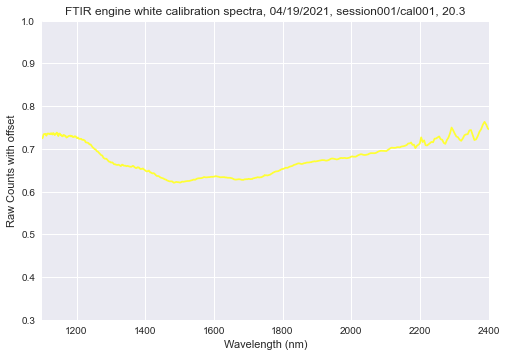

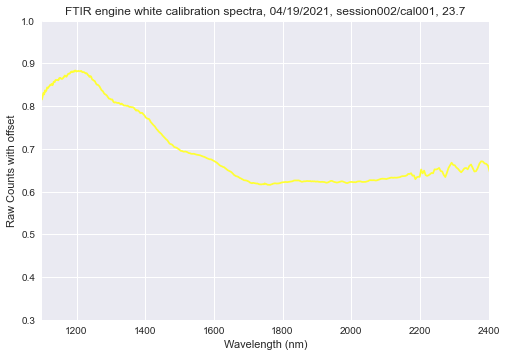

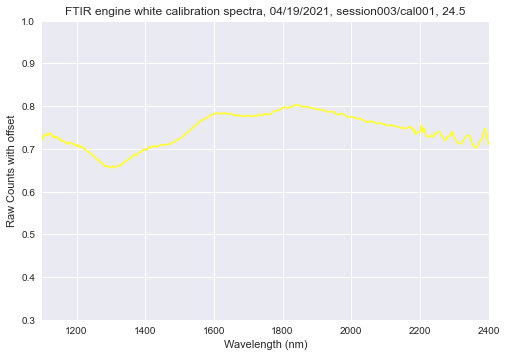

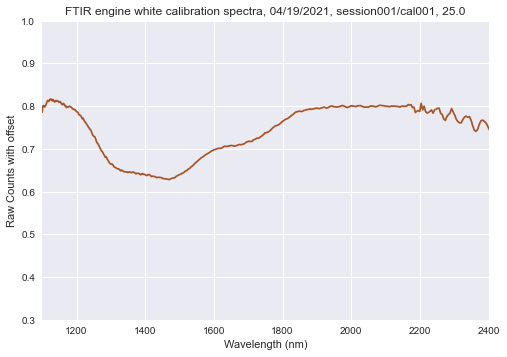

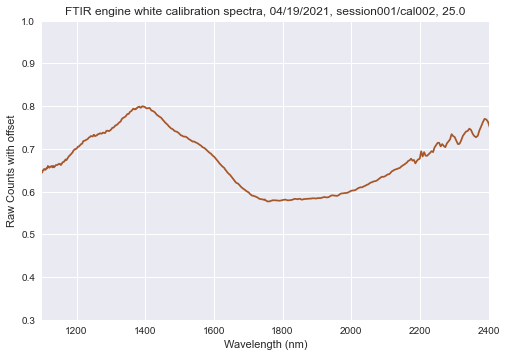

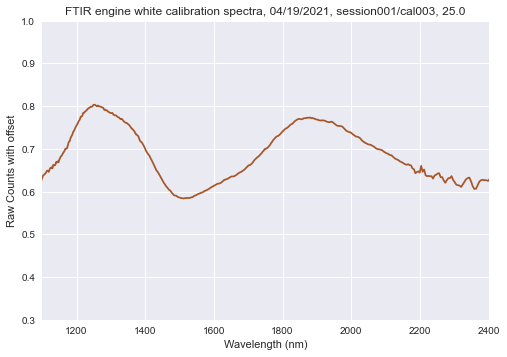

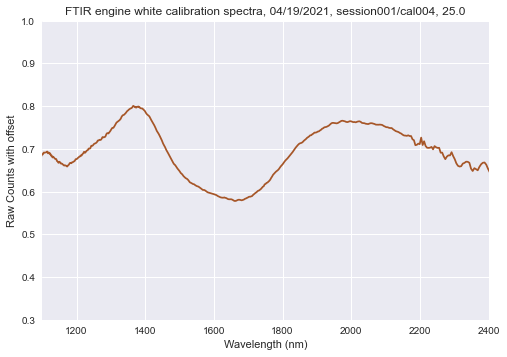

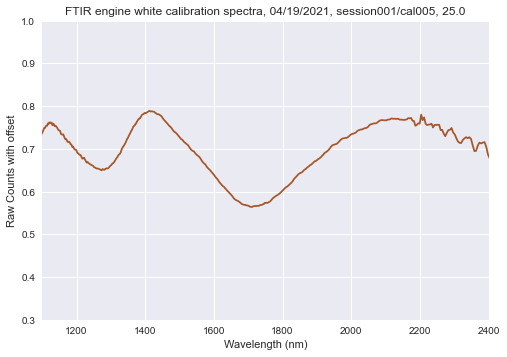

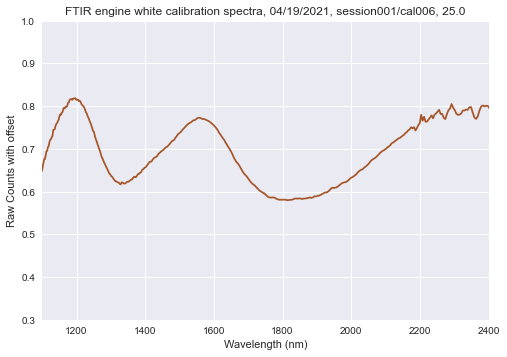

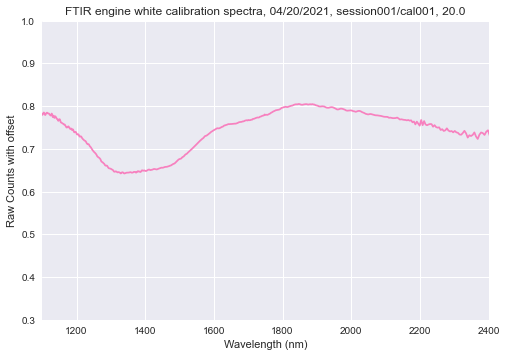

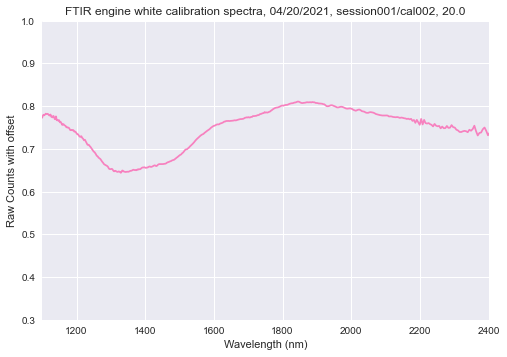

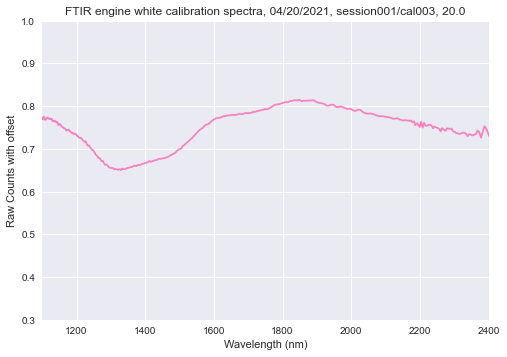

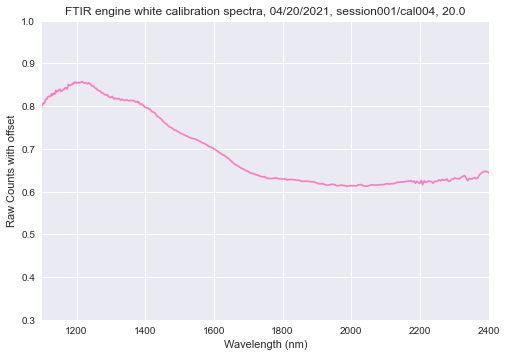

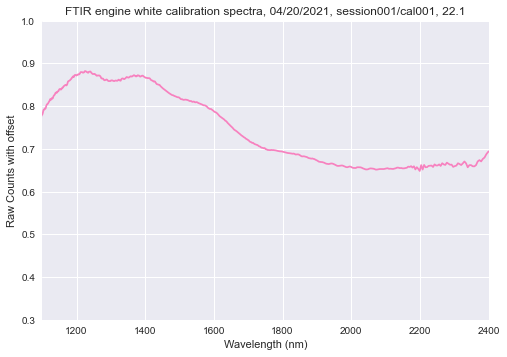

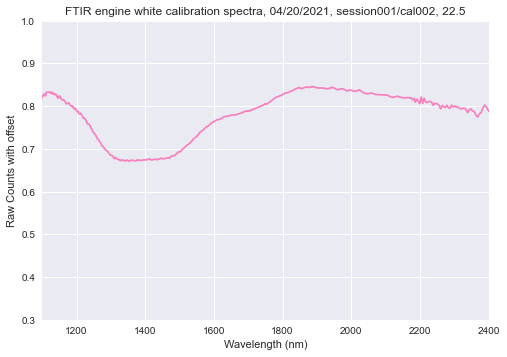

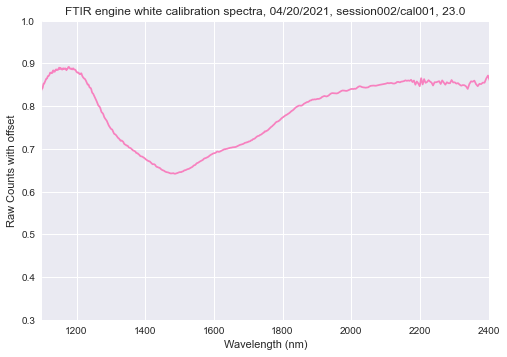

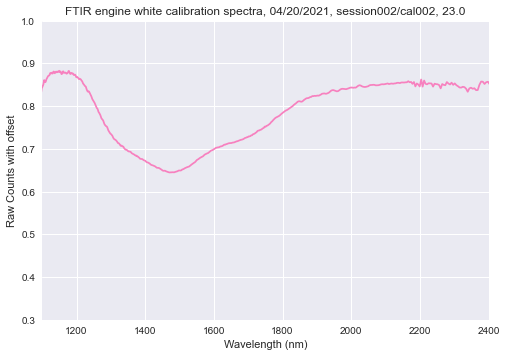

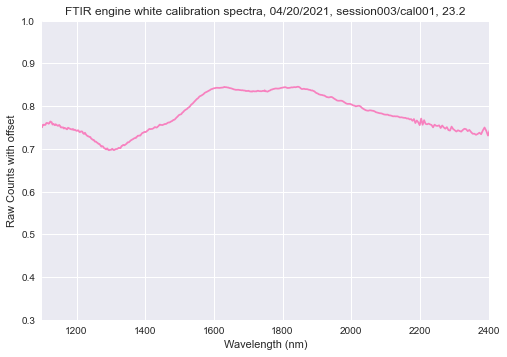

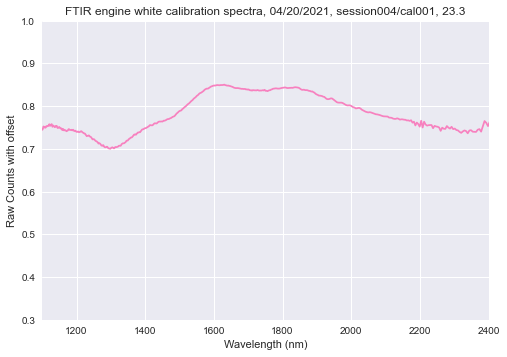

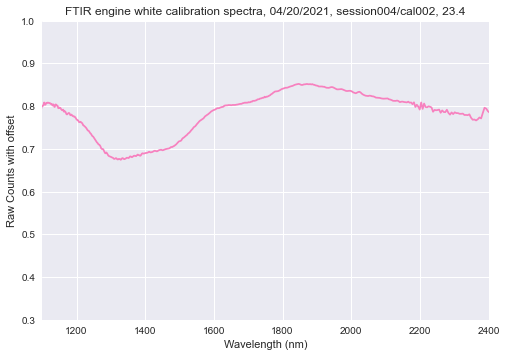

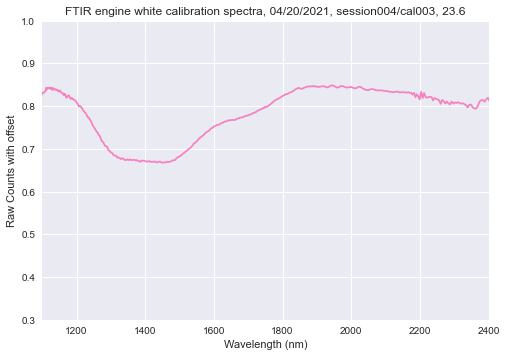

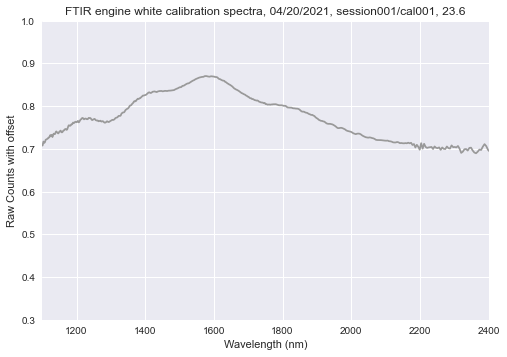

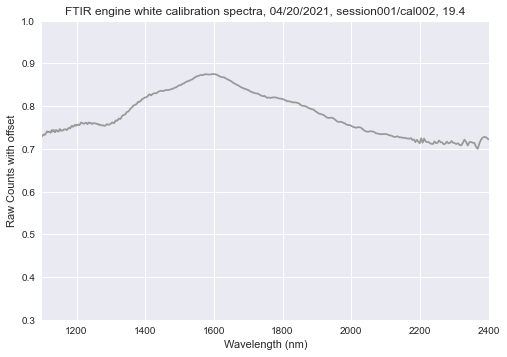

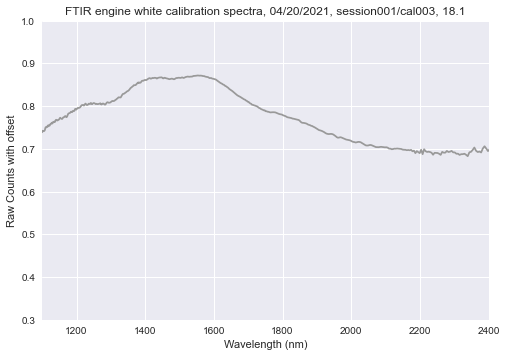

In [205]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum2'][:]

# ax.set_ylim(10000, 30000)
for cal in vis_cals:
    fig, ax = plt.subplots()
    
    ax.set_ylabel("Raw Counts with offset")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.3, 1.0)
    ax.set_xlim(1100, 2400)
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.Set1(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]/big_cal
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.set_title(f"FTIR engine white calibration spectra, {label}, {cal[1]}, {temp:0.1f}")

    plt.show()
    plt.close()

In [206]:
cal_temps = []
for cal in vis_cals:   
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        cal_temps.append(h5_file[cal[1]].attrs['ftir_temperature'])
print(cal_temps)
        

[2.6923738872865783, 2.6923738872865783, 4.752088330126355, 29.6824810831759, 27.89792262442006, 27.89792262442006, 27.526653111467795, 31.26040053289762, 25.484470789953036, 25.484470789953036, 25.484470789953036, 25.484470789953036, 25.511659256254234, 25.511659256254234, 25.511659256254234, 25.511659256254234, 25.511659256254234, 25.511659256254234, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 21.92048979683858, 22.14864751125117, 22.14864751125117, 22.14864751125117, 14.514367584970273, 14.71094037304033, 14.71094037304033, 14.71094037304033, 17.688762708218064, 17.688762708218064, 17.688762708218064, 17.101213138770106, 17.101213138770106, 17.101213138770106, 20.299817058869564, 23.66879534195624, 24.526988406745375, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 25.048205953433182, 20.005789715422964, 20

In [145]:
vis_cals[0]

('210401_tests/vis_ftir_test1.h5', 'session001/cal001')

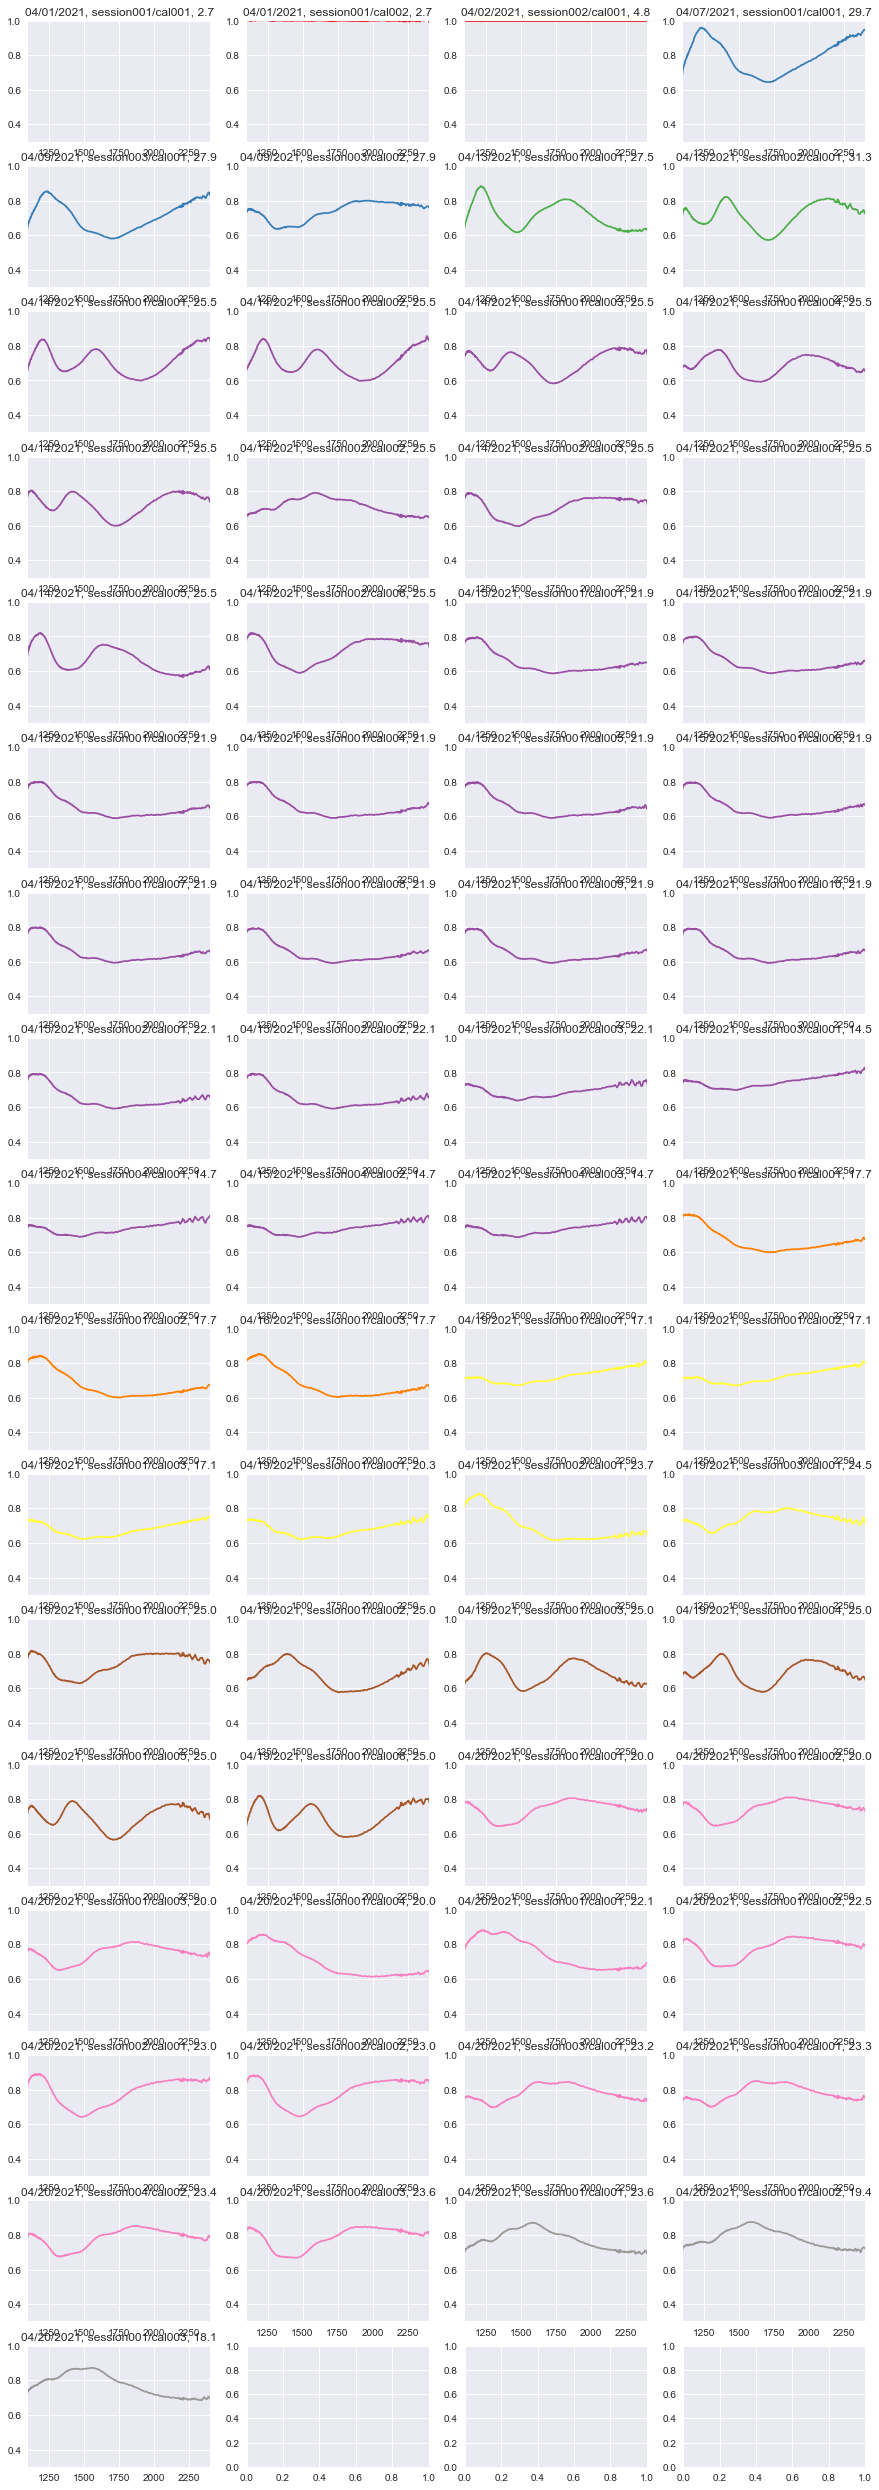

In [208]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum2'][:]

# ax.set_ylim(10000, 30000)
fig, axs = plt.subplots(nrows=17, ncols=4, figsize=(15, 45))
for ax, cal in zip(axs.flat, vis_cals):
    
    
    # ax.set_ylabel("Raw Counts with offset")
    # ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.3, 1.0)
    ax.set_xlim(1100, 2400)
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.Set1(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]/big_cal
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.set_title(f"{label}, {cal[1]}, {temp:0.1f}")

plt.show()
plt.close()

In [155]:
len(vis_cals)

56

In [164]:
file_names = ['210402_SOC_canister/tests_210402.h5',
              '210413_BNP_transect/BNP_data_collection_210413.h5']
file_dates =['04/02/2021', '04/13/2021']

In [165]:
blah_cals = []
for file_name in file_names:
    entire_path = f'{path_name}{file_name}'
    print(file_name)
    with h5py.File(entire_path, 'r') as h5_file:
        calibrations = create_list_of_calibrations_in_node(h5_file, "/")
        for calibration in calibrations:
            blah_cals.append((file_name, calibration))

210402_SOC_canister/tests_210402.h5
210413_BNP_transect/BNP_data_collection_210413.h5


In [166]:
blah_cals

[('210402_SOC_canister/tests_210402.h5', 'session002/cal001'),
 ('210413_BNP_transect/BNP_data_collection_210413.h5', 'session001/cal001'),
 ('210413_BNP_transect/BNP_data_collection_210413.h5', 'session002/cal001')]

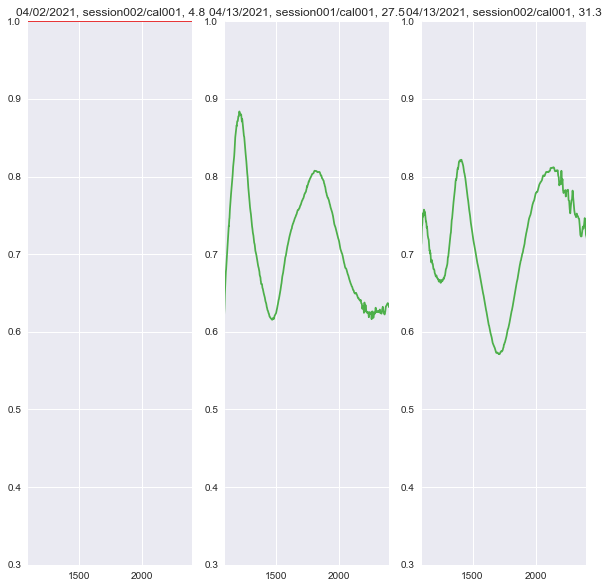

In [168]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum2'][:]

# ax.set_ylim(10000, 30000)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax, cal in zip(axs.flat, blah_cals):
    # ax.set_ylabel("Raw Counts with offset")
    # ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.3, 1.0)
    ax.set_xlim(1100, 2400)
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.Set1(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]/big_cal
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.set_title(f"{label}, {cal[1]}, {temp:0.1f}")

plt.show()
plt.close()

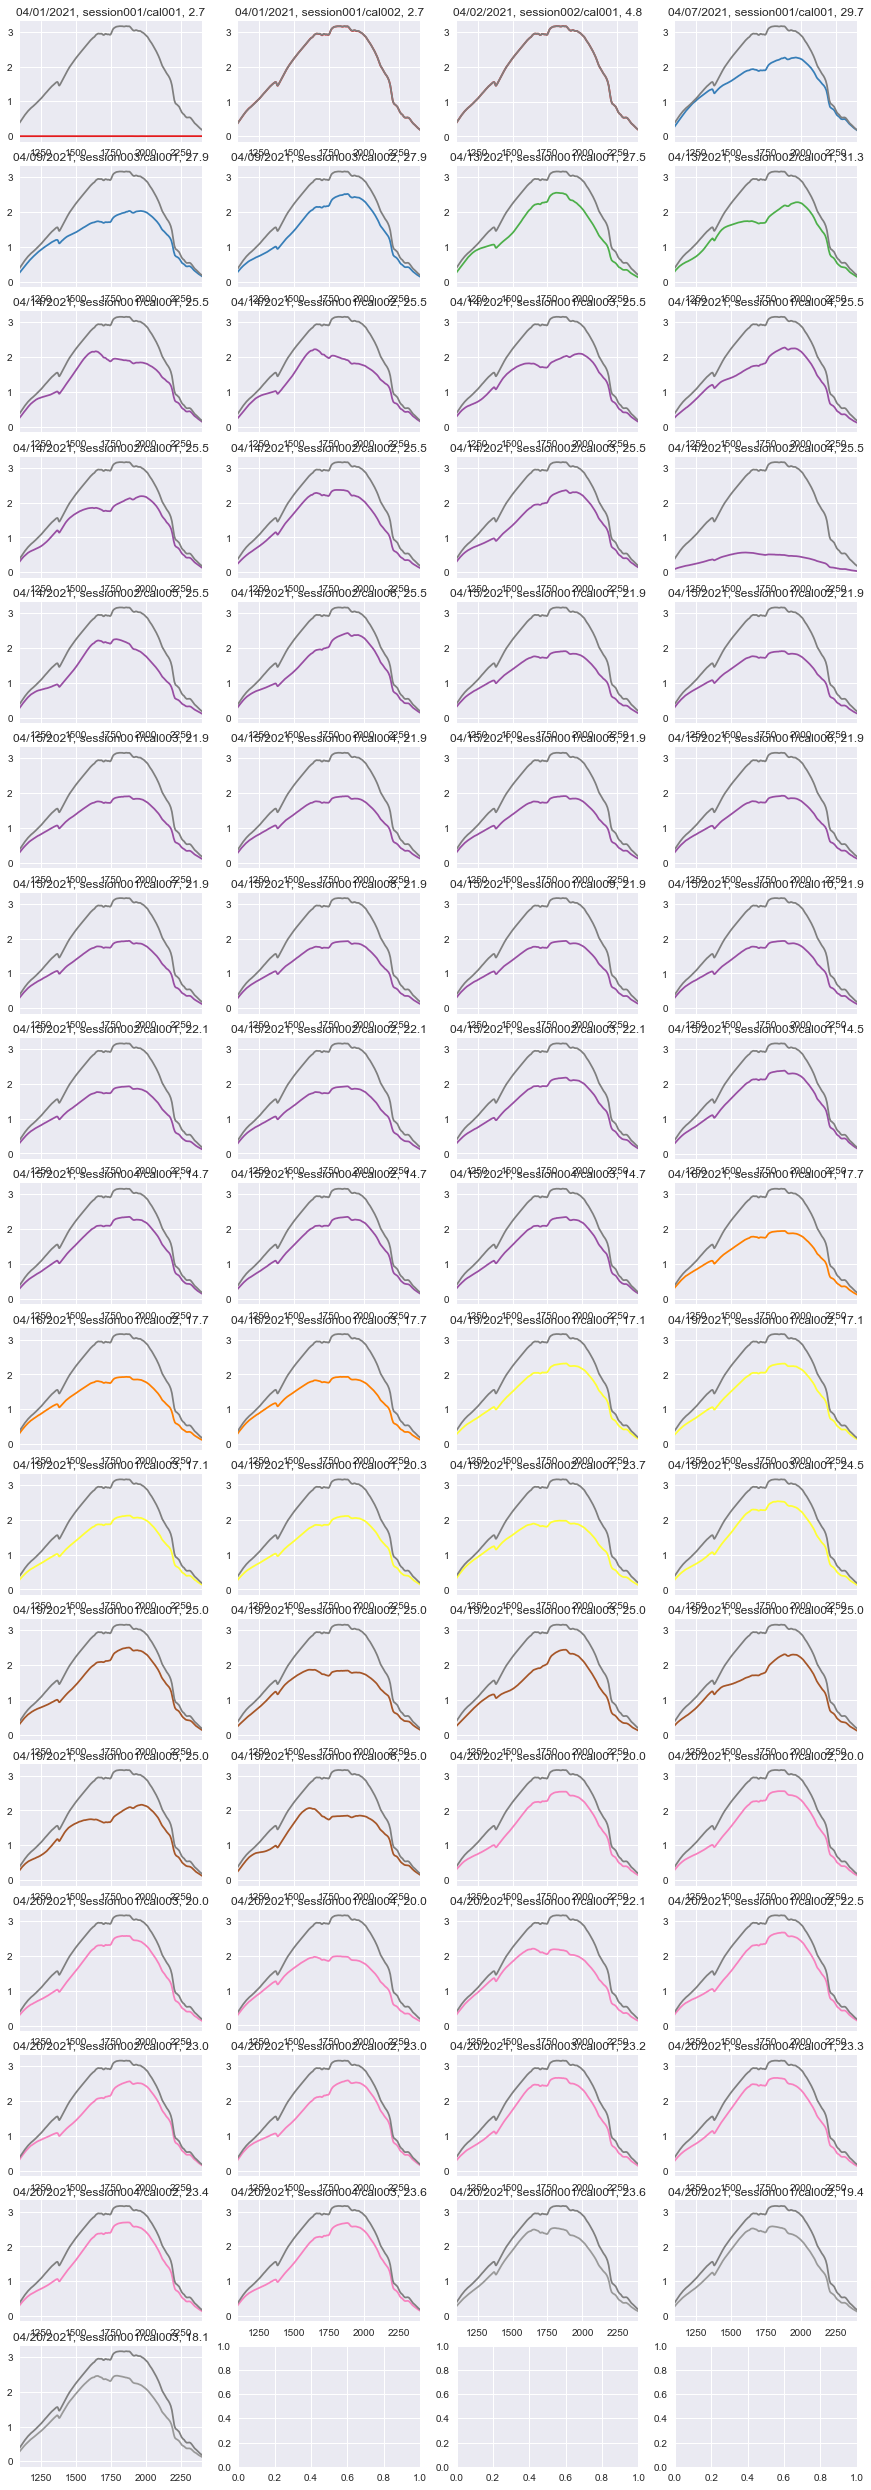

In [209]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum2'][:]

# ax.set_ylim(10000, 30000)
fig, axs = plt.subplots(nrows=17, ncols=4, figsize=(15, 45))
for ax, cal in zip(axs.flat, vis_cals):
    
    
    # ax.set_ylabel("Raw Counts with offset")
    # ax.set_xlabel("Wavelength (nm)")
    

    ax.set_xlim(1100, 2400)
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.Set1(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum2'][:]
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec2_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.plot(waves, big_cal, "tab:gray")
        ax.set_title(f"{label}, {cal[1]}, {temp:0.1f}")

plt.show()
plt.close()

In [183]:
this_afternoon = path_name + '210420_green_tests/green_testing_210420b.h5'
temps = []
with h5py.File(this_afternoon, 'r') as h5_file:
    new_insertions = list(h5_file['session001/cal001'].keys())
    print(h5_file['session001/cal002'].keys())

<KeysViewHDF5 ['ins009', 'ins010']>


In [184]:
new_insertions

['ins001',
 'ins002',
 'ins003',
 'ins004',
 'ins005',
 'ins006',
 'ins007',
 'ins008']

In [185]:
temps = []
with h5py.File(this_afternoon, 'r') as h5_file:
    for insertion in new_insertions:
        temps.append(h5_file[f'session001/cal001/{insertion}'].attrs['ftir_temp'])
    temps.append(h5_file['session001/cal002/ins009'].attrs['ftir_temp'])
    temps.append(h5_file['session001/cal002/ins010'].attrs['ftir_temp'])
print(temps)    

[22.14864751125117, 22.234001763175627, 22.347635787215154, 22.3192455782077, 22.40437979731206, 22.40437979731206, 22.432733660167855, 22.432733660167855, 22.46107546928181, 22.546028880775225]


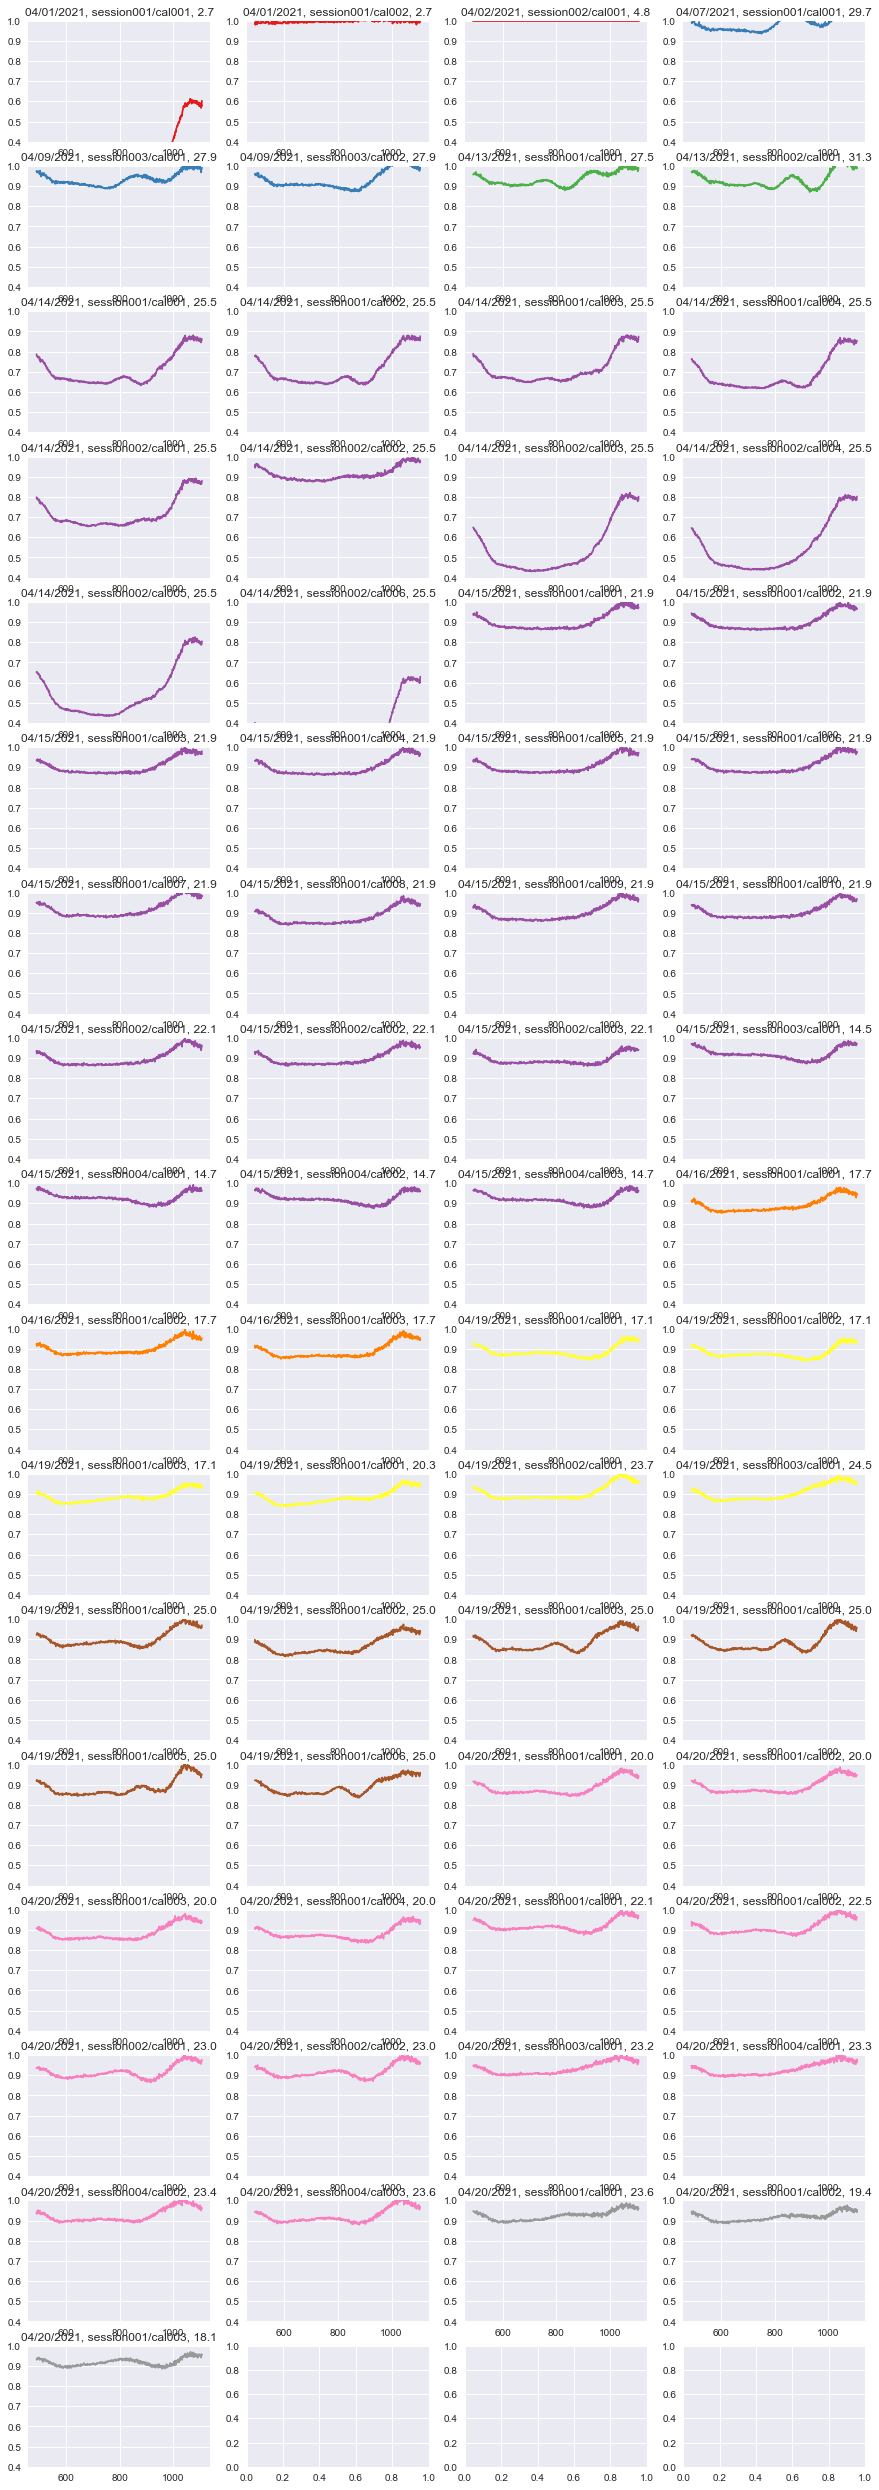

In [210]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum'][:]

# ax.set_ylim(10000, 30000)
fig, axs = plt.subplots(nrows=17, ncols=4, figsize=(15, 45))
for ax, cal in zip(axs.flat, vis_cals):
    
    
    # ax.set_ylabel("Raw Counts with offset")
    # ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.4, 1.0)
    # ax.set_xlim(1100, 2400)
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.Set1(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum'][:]/big_cal
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec1_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.set_title(f"{label}, {cal[1]}, {temp:0.1f}")

plt.show()
plt.close()

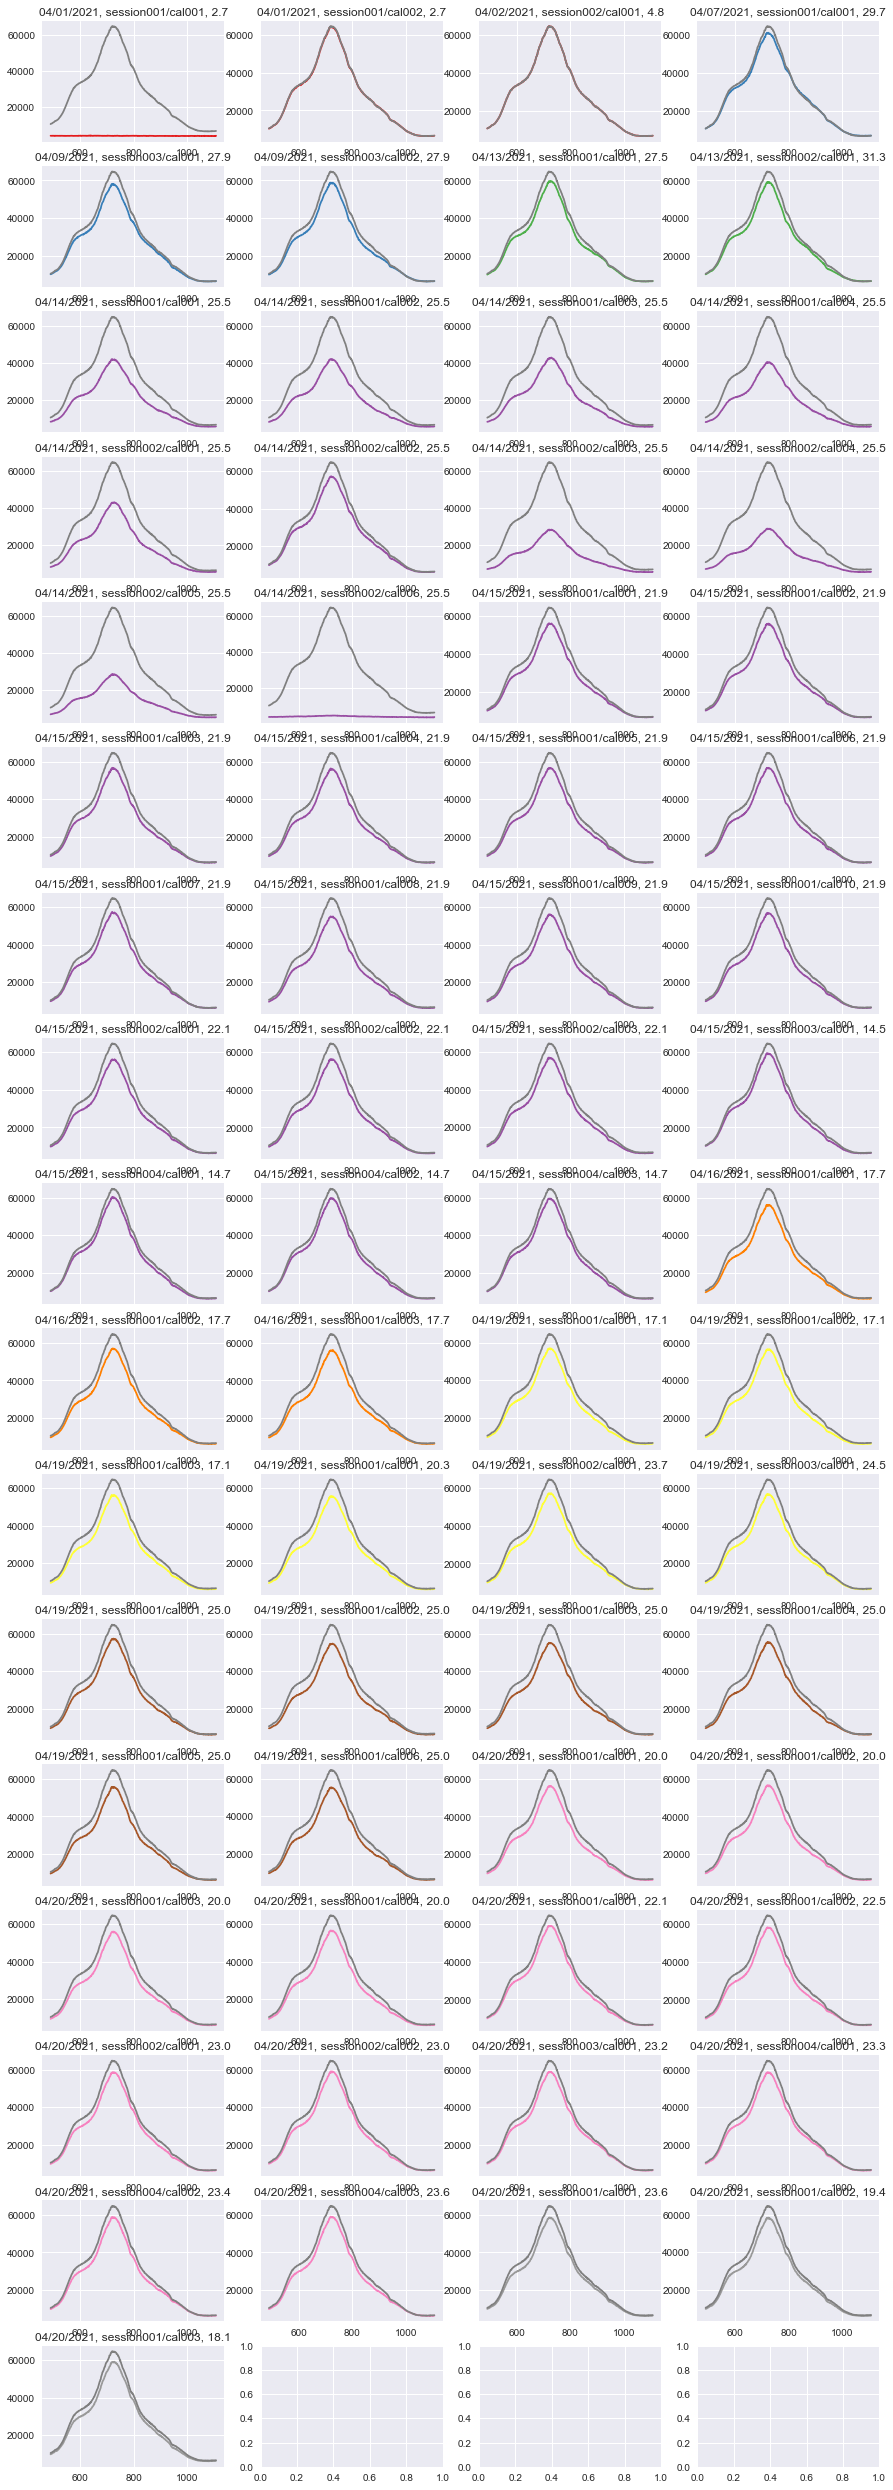

In [211]:
big_cal_name = '210402_SOC_canister/tests_210402.h5'
file_name = path_name + big_cal_name
with h5py.File(file_name, 'r') as h5_file:
    big_cal = h5_file['session002/cal001'].attrs['white_spectrum'][:]

# ax.set_ylim(10000, 30000)
fig, axs = plt.subplots(nrows=17, ncols=4, figsize=(15, 45))
for ax, cal in zip(axs.flat, vis_cals):
    
    
    # ax.set_ylabel("Raw Counts with offset")
    # ax.set_xlabel("Wavelength (nm)")
    

    # ax.set_xlim(1100, 2400)
    index = vis_cals.index(cal)
    offset = index * 0.2
    
    entire_path = f'{path_name}{cal[0]}'
    with h5py.File(entire_path, 'r') as h5_file:
        color = plt.cm.Set1(vis_file_names.index(cal[0])/len(vis_file_names))
        spectrum = h5_file[cal[1]].attrs['white_spectrum'][:]
        temp = h5_file[cal[1]].attrs['ftir_temperature']
        waves = h5_file[cal[1]].attrs['spec1_wavelengths_vector'][:]
        label = vis_file_dates[vis_file_names.index(cal[0])]
        ax.plot(waves, spectrum, color=color, label=label)
        ax.plot(waves, big_cal, "tab:gray")
        ax.set_title(f"{label}, {cal[1]}, {temp:0.1f}")

plt.show()
plt.close()